# ANALISIS EXPLORATORIO DE DATOS

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import folium
import geopandas as gpd
from folium.plugins import HeatMap




In [2]:
# Importar archivo para trabajar
df = pd.read_csv('/Users/benjaminzelaya/Desktop/PGF/PG/Sitios_Unidos.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025011 entries, 0 to 3025010
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   name              object 
 2   address           object 
 3   gmap_id           object 
 4   description       object 
 5   latitude          float64
 6   longitude         float64
 7   category          object 
 8   avg_rating        float64
 9   num_of_reviews    int64  
 10  price             object 
 11  hours             object 
 12  MISC              object 
 13  state             object 
 14  relative_results  object 
 15  url               object 
dtypes: float64(3), int64(2), object(11)
memory usage: 369.3+ MB


In [4]:
df.columns

Index(['Unnamed: 0', 'name', 'address', 'gmap_id', 'description', 'latitude',
       'longitude', 'category', 'avg_rating', 'num_of_reviews', 'price',
       'hours', 'MISC', 'state', 'relative_results', 'url'],
      dtype='object')

In [5]:
# Calcula el porcentaje de valores faltantes en cada columna
missing_percentage = df.isnull().mean() * 100

# Filtra las columnas que tienen valores faltantes
columns_with_missing_values = missing_percentage[missing_percentage > 0]

# Muestra el porcentaje de valores faltantes en cada columna
print("Porcentaje de valores faltantes por columna:")
print(columns_with_missing_values)

Porcentaje de valores faltantes por columna:
name                 0.001653
address              2.661511
description         91.593783
category             0.575833
price               90.902413
hours               26.029823
MISC                22.837405
state               24.676109
relative_results     9.753948
dtype: float64


In [6]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
df.head(5)

Unnamed: 0              name  \
0           0   Porter Pharmacy   
1           1      City Textile   
2           2      San Soo Dang   
3           3      Nova Fabrics   
4           4  Nobel Textile Co   

                                             address  \
0  Porter Pharmacy, 129 N Second St, Cochran, GA ...   
1  City Textile, 3001 E Pico Blvd, Los Angeles, C...   
2  San Soo Dang, 761 S Vermont Ave, Los Angeles, ...   
3  Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...   
4  Nobel Textile Co, 719 E 9th St, Los Angeles, C...   

                                 gmap_id description   latitude   longitude  \
0  0x88f16e41928ff687:0x883dad4fd048e8f8         NaN  32.388300  -83.357100   
1  0x80c2c98c0e3c16fd:0x29ec8a728764fdf9         NaN  34.018891 -118.215290   
2  0x80c2c778e3b73d33:0xbdc58662a4a97d49         NaN  34.058092 -118.292130   
3   0x80c2c89923b27a41:0x32041559418d447         NaN  34.023669 -118.232930   
4  0x80c2c632f933b073:0xc31785961fe826a6         NaN  34.036694 -118.249421   

                category  avg_rating  num_of_reviews price  \
0           ['Pharmacy']         4.9              16   NaN   
1   ['Textile exporter']         4.5               6   NaN   
2  ['Korean restaurant']         4.4              18   NaN   
3       ['Fabric store']         3.3               6   NaN   
4       ['Fabric store']         4.3               7   NaN   

                                               hours  \
0  [['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...   
1                                                NaN   
2  [['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...   
3  [['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...   
4  [['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...   

                                                MISC              state  \
0  {'Service options': ['In-store shopping', 'Sam...  Open ⋅ Closes 6PM   
1                                                NaN           Open now   
2  {'Service options': ['Takeout', 'Dine-in', 'De...  Open ⋅ Closes 6PM   
3  {'Service options': ['In-store shopping'], 'Pa...  Open ⋅ Closes 5PM   
4           {'Service options': ['In-store pickup']}  Open ⋅ Closes 5PM   

                                    relative_results  \
0  ['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...   
1  ['0x80c2c624136ea88b:0xb0315367ed448771', '0x8...   
2  ['0x80c2c78249aba68f:0x35bf16ce61be751d', '0x8...   
3  ['0x80c2c8811477253f:0x23a8a492df1918f7', '0x8...   
4  ['0x80c2c62c496083d1:0xdefa11317fe870a1', '0x8...   

                                                 url  
0  https://www.google.com/maps/place//data=!4m2!3...  
1  https://www.google.com/maps/place//data=!4m2!3...  
2  https://www.google.com/maps/place//data=!4m2!3...  
3  https://www.google.com/maps/place//data=!4m2!3...  
4  https://www.google.com/maps/place//data=!4m2!3...

In [7]:
df.dtypes

Unnamed: 0            int64
name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object

In [8]:
df_union = pd.read_csv('/Users/benjaminzelaya/Desktop/PGF/PG/Union.csv')

In [9]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025011 entries, 0 to 3025010
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   category    object 
 2   avg_rating  float64
 3   gmap_id     object 
 4   name        object 
 5   Estado      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 138.5+ MB


In [10]:
df_union.columns

Index(['Unnamed: 0', 'category', 'avg_rating', 'gmap_id', 'name', 'Estado'], dtype='object')

In [11]:
# Calcula el porcentaje de valores faltantes en cada columna
missing_percentage_df_union = df_union.isnull().mean() * 100

# Filtra las columnas que tienen valores faltantes
columns_with_missing_values_df_union = missing_percentage_df_union[missing_percentage_df_union > 0]

# Muestra el porcentaje de valores faltantes en cada columna
print("Porcentaje de valores faltantes por columna:")
print(columns_with_missing_values_df_union)

Porcentaje de valores faltantes por columna:
category     0.575833
name         0.002215
Estado      64.145453
dtype: float64


In [12]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
df_union.head(5)

Unnamed: 0               category  avg_rating  \
0           0           ['Pharmacy']         4.9   
1           1   ['Textile exporter']         4.5   
2           2  ['Korean restaurant']         4.4   
3           3       ['Fabric store']         3.3   
4           4       ['Fabric store']         4.3   

                                 gmap_id              name      Estado  
0  0x88f16e41928ff687:0x883dad4fd048e8f8   Porter Pharmacy     Georgia  
1  0x80c2c98c0e3c16fd:0x29ec8a728764fdf9      City Textile         NaN  
2  0x80c2c778e3b73d33:0xbdc58662a4a97d49      San Soo Dang  California  
3   0x80c2c89923b27a41:0x32041559418d447      Nova Fabrics         NaN  
4  0x80c2c632f933b073:0xc31785961fe826a6  Nobel Textile Co  California

# ANALIZAMOS EL ESTADO DE CALIFORNIA

In [13]:
california_df = df_union[df_union['Estado'] == 'California']

california_df

Unnamed: 0                                           category  \
2                 2                              ['Korean restaurant']   
4                 4                                   ['Fabric store']   
5                 5                                   ['Fabric store']   
6                 6                                     ['Restaurant']   
13               13  ['Ski rental service', 'Snowboard rental servi...   
...             ...                                                ...   
2084748     2084748                                 ['Auto body shop']   
2084768     2084768  ['Massage therapist', 'Metaphysical supply sto...   
2084769     2084769          ['Recycling center', 'Electronics store']   
2084962     2084962  ['Tennis store', 'Sporting goods store', 'Store']   
2084965     2084965                     ['Park', 'Tourist attraction']   

         avg_rating                                gmap_id  \
2               4.4  0x80c2c778e3b73d33:0xbdc58662a4a97d49   
4               4.3  0x80c2c632f933b073:0xc31785961fe826a6   
5               3.5  0x80c2cf163db6bc89:0x219484e2edbcfa41   
6               4.5  0x80dd2b4c8555edb7:0xfc33d65c4bdbef42   
13              5.0  0x80960c29f2e3bf29:0x4b291f0d275a5699   
...             ...                                    ...   
2084748         4.7  0x808e3316dbc5c029:0xde142c328365e55f   
2084768         4.9  0x54cde727ede36d0b:0x3d69616c4b1fa77b   
2084769         4.5  0x80c2c6669cf8ceaf:0xbcad67ba8ebfc8aa   
2084962         4.7  0x808fbb2516173e1f:0x7cffe4df921d6774   
2084965         4.6  0x808fc0c19ba4e761:0x589c9ad71c62a420   

                                             name      Estado  
2                                    San Soo Dang  California  
4                                Nobel Textile Co  California  
5                   Matrix International Textiles  California  
6                                    Vons Chicken  California  
13       Black Tie Ski Rental Delivery of Mammoth  California  
...                                           ...         ...  
2084748                     Koss Collision Center  California  
2084768            Sacred Seed Crystals & Healing  California  
2084769             Homeboy Electronics Recycling  California  
2084962                     Tennis Town & Country  California  
2084965                              Central Park  California  

[74620 rows x 6 columns]

In [14]:
california_df['category'].unique

<bound method Series.unique of 2                                      ['Korean restaurant']
4                                           ['Fabric store']
5                                           ['Fabric store']
6                                             ['Restaurant']
13         ['Ski rental service', 'Snowboard rental servi...
                                 ...                        
2084748                                   ['Auto body shop']
2084768    ['Massage therapist', 'Metaphysical supply sto...
2084769            ['Recycling center', 'Electronics store']
2084962    ['Tennis store', 'Sporting goods store', 'Store']
2084965                       ['Park', 'Tourist attraction']
Name: category, Length: 74620, dtype: object>

In [15]:
california_restaurant_df = california_df[(california_df['Estado'] == 'California') & (california_df['category'].str.contains('restaurant'))]

# Mostrar el DataFrame resultante
california_restaurant_df

Unnamed: 0                                           category  \
2                 2                              ['Korean restaurant']   
1548           1548  ['Hamburger restaurant', 'American restaurant'...   
2237           2237  ['Cafe', 'Breakfast restaurant', 'Hamburger re...   
2750           2750  ['Chinese restaurant', 'Asian fusion restauran...   
3676           3676               ['Mexican restaurant', 'Restaurant']   
...             ...                                                ...   
2084263     2084263  ['Coffee shop', 'Breakfast restaurant', 'Cafe'...   
2084614     2084614  ['American restaurant', 'Brunch restaurant', '...   
2084671     2084671  ['Fast food restaurant', 'Hamburger restaurant...   
2084681     2084681  ['Chinese restaurant', 'Asian restaurant', 'Re...   
2084746     2084746                               ['Pizza restaurant']   

         avg_rating                                gmap_id  \
2               4.4  0x80c2c778e3b73d33:0xbdc58662a4a97d49   
1548            3.7  0x80c2d765f8c90a3d:0x16afb75943e7ad50   
2237            4.6  0x54d15b5c2681df95:0xa611357b2e497e58   
2750            4.8  0x80dc736926023cb9:0xb3377acd90a46f16   
3676            3.4  0x808f7fd770b93dfd:0x9163bc5a8883c63b   
...             ...                                    ...   
2084263         4.2  0x808e35adfb4ad331:0x8ff446481d2b9c3a   
2084614         4.4  0x80d953599657345f:0x326882d24ffa795e   
2084671         4.0  0x80c290cd5fcce25d:0x296bf3eca368d132   
2084681         3.9  0x80c2956b34fc26c1:0x2f3b0897def449d6   
2084746         4.6  0x808fb57e5ffcf77f:0xdeb76c221475bdf0   

                               name      Estado  
2                      San Soo Dang  California  
1548           Cowboy Burgers & BBQ  California  
2237                  Beau Pre Cafe  California  
2750     Chin's Szechwan - Carlsbad  California  
3676                         Mijita  California  
...                             ...         ...  
2084263                   Starbucks  California  
2084614                 Rustic Root  California  
2084671                     Wendy's  California  
2084681               Panda Express  California  
2084746                 Metro Pizza  California  

[6965 rows x 6 columns]

In [16]:
california_restaurant_df['category'] = california_restaurant_df['category'].apply(lambda x: x.strip("[]").replace("'", "").split(", ") if isinstance(x, str) else x)

# Utilizar explode() para separar las categorías en filas individuales
separated_df = california_restaurant_df.explode('category')

# Mostrar el nuevo DataFrame resultante
separated_df

/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_22750/540995809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_restaurant_df['category'] = california_restaurant_df['category'].apply(lambda x: x.strip("[]").replace("'", "").split(", ") if isinstance(x, str) else x)


Unnamed: 0              category  avg_rating  \
2                 2     Korean restaurant         4.4   
1548           1548  Hamburger restaurant         3.7   
1548           1548   American restaurant         3.7   
1548           1548   Barbecue restaurant         3.7   
1548           1548  Fast food restaurant         3.7   
...             ...                   ...         ...   
2084671     2084671            Restaurant         4.0   
2084681     2084681    Chinese restaurant         3.9   
2084681     2084681      Asian restaurant         3.9   
2084681     2084681            Restaurant         3.9   
2084746     2084746      Pizza restaurant         4.6   

                                       gmap_id                  name  \
2        0x80c2c778e3b73d33:0xbdc58662a4a97d49          San Soo Dang   
1548     0x80c2d765f8c90a3d:0x16afb75943e7ad50  Cowboy Burgers & BBQ   
1548     0x80c2d765f8c90a3d:0x16afb75943e7ad50  Cowboy Burgers & BBQ   
1548     0x80c2d765f8c90a3d:0x16afb75943e7ad50  Cowboy Burgers & BBQ   
1548     0x80c2d765f8c90a3d:0x16afb75943e7ad50  Cowboy Burgers & BBQ   
...                                        ...                   ...   
2084671  0x80c290cd5fcce25d:0x296bf3eca368d132               Wendy's   
2084681  0x80c2956b34fc26c1:0x2f3b0897def449d6         Panda Express   
2084681  0x80c2956b34fc26c1:0x2f3b0897def449d6         Panda Express   
2084681  0x80c2956b34fc26c1:0x2f3b0897def449d6         Panda Express   
2084746  0x808fb57e5ffcf77f:0xdeb76c221475bdf0           Metro Pizza   

             Estado  
2        California  
1548     California  
1548     California  
1548     California  
1548     California  
...             ...  
2084671  California  
2084681  California  
2084681  California  
2084681  California  
2084746  California  

[19637 rows x 6 columns]

In [17]:
# separated_df.drop(columns=['category_single'], inplace=True)

# # Mostrar el DataFrame resultante
# separated_df

In [18]:
unique_categories = separated_df['category'].unique()
unique_categories

array(['Korean restaurant', 'Hamburger restaurant', 'American restaurant',
       'Barbecue restaurant', 'Fast food restaurant',
       'Mexican restaurant', 'Sandwich shop', 'Cafe',
       'Breakfast restaurant', 'Lunch restaurant', 'Chinese restaurant',
       'Asian fusion restaurant', 'Chinese noodle restaurant',
       'Dumpling restaurant', 'Soup restaurant', 'Restaurant',
       'Asian restaurant', 'Health food restaurant', 'Rice restaurant',
       'Sushi restaurant', 'Japanese restaurant',
       'Southeast Asian restaurant', 'Coffee shop', 'Pizza restaurant',
       'Filipino restaurant', 'Steak house', 'Bar', 'Kosher restaurant',
       'Bakery', 'Bubble tea store', 'Caterer', 'Cupcake shop', 'Deli',
       'Italian restaurant', 'Sports bar', 'Latin American restaurant',
       'Takeout Restaurant', 'Diner', 'Californian restaurant',
       'Distillery', 'Vietnamese restaurant', 'Indian restaurant',
       'South Asian restaurant', 'Catering food and drink supplier',
       

In [19]:
# Filtrar las categorías que no son 'Restaurant', 'caterer' o 'catering'
separated_df = separated_df[(separated_df['category'] != 'Restaurant') & 
                            (separated_df['category'] != 'caterer') &
                            (separated_df['category'] != 'catering')]

# Mostrar el DataFrame resultante
separated_df

Unnamed: 0              category  avg_rating  \
2                 2     Korean restaurant         4.4   
1548           1548  Hamburger restaurant         3.7   
1548           1548   American restaurant         3.7   
1548           1548   Barbecue restaurant         3.7   
1548           1548  Fast food restaurant         3.7   
...             ...                   ...         ...   
2084671     2084671  Fast food restaurant         4.0   
2084671     2084671  Hamburger restaurant         4.0   
2084681     2084681    Chinese restaurant         3.9   
2084681     2084681      Asian restaurant         3.9   
2084746     2084746      Pizza restaurant         4.6   

                                       gmap_id                  name  \
2        0x80c2c778e3b73d33:0xbdc58662a4a97d49          San Soo Dang   
1548     0x80c2d765f8c90a3d:0x16afb75943e7ad50  Cowboy Burgers & BBQ   
1548     0x80c2d765f8c90a3d:0x16afb75943e7ad50  Cowboy Burgers & BBQ   
1548     0x80c2d765f8c90a3d:0x16afb75943e7ad50  Cowboy Burgers & BBQ   
1548     0x80c2d765f8c90a3d:0x16afb75943e7ad50  Cowboy Burgers & BBQ   
...                                        ...                   ...   
2084671  0x80c290cd5fcce25d:0x296bf3eca368d132               Wendy's   
2084671  0x80c290cd5fcce25d:0x296bf3eca368d132               Wendy's   
2084681  0x80c2956b34fc26c1:0x2f3b0897def449d6         Panda Express   
2084681  0x80c2956b34fc26c1:0x2f3b0897def449d6         Panda Express   
2084746  0x808fb57e5ffcf77f:0xdeb76c221475bdf0           Metro Pizza   

             Estado  
2        California  
1548     California  
1548     California  
1548     California  
1548     California  
...             ...  
2084671  California  
2084671  California  
2084681  California  
2084681  California  
2084746  California  

[17604 rows x 6 columns]

In [20]:

# Calcular la cantidad de veces que aparece cada categoría
category_counts = separated_df['category'].value_counts()

# Encontrar la categoría con la mayor cantidad
most_common_category = category_counts.idxmax()

# Filtrar el DataFrame original en función de la categoría con la mayor cantidad
most_common_category_df = separated_df[separated_df['category'] == most_common_category]

# Mostrar el DataFrame resultante
most_common_category_df

Unnamed: 0            category  avg_rating  \
1548           1548  Mexican restaurant         3.7   
3676           3676  Mexican restaurant         3.4   
10701         10701  Mexican restaurant         4.3   
10804         10804  Mexican restaurant         4.0   
17547         17547  Mexican restaurant         4.7   
...             ...                 ...         ...   
2082496     2082496  Mexican restaurant         3.9   
2082948     2082948  Mexican restaurant         3.9   
2082966     2082966  Mexican restaurant         4.6   
2083396     2083396  Mexican restaurant         4.1   
2083913     2083913  Mexican restaurant         4.6   

                                       gmap_id  \
1548     0x80c2d765f8c90a3d:0x16afb75943e7ad50   
3676     0x808f7fd770b93dfd:0x9163bc5a8883c63b   
10701    0x80c2c798ad41d859:0x8823cd86d2abd5b3   
10804    0x80c2d4c17351e5d5:0x25ec6df3990c5322   
17547    0x808f8f37c1b6d241:0x1b3bd5046ff3ce84   
...                                        ...   
2082496  0x80c2b82e593589a1:0x35602b6daadce0d7   
2082948  0x8094f0177b53a48f:0x1ec8610b98aa661e   
2082966  0x809467e6d96b758f:0x6223b7df070e0610   
2083396  0x808fb670fb4cefb7:0xc6d63f9f0105d24a   
2083913  0x808f7fd12075e32f:0x7d48cc9cd782fa6e   

                                    name      Estado  
1548                Cowboy Burgers & BBQ  California  
3676                              Mijita  California  
10701              La Superior Panaderia  California  
10804                         Taco Shack  California  
17547                   Tacos Dos Primos  California  
...                                  ...         ...  
2082496                        Taco Bell  California  
2082948  Alfonso's Carniceria y Taqueria  California  
2082966             DON SALSA'S TAQUERIA  California  
2083396                Garcia's Taqueria  California  
2083913               Lupulandia Brewing  California  

[1268 rows x 6 columns]

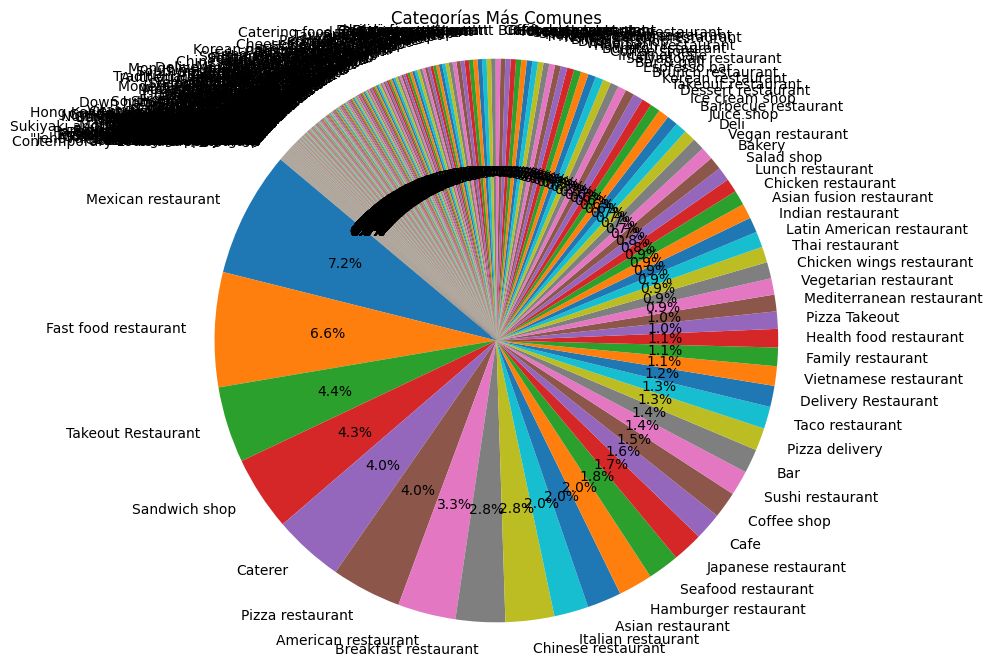

In [21]:
# Contar la cantidad de veces que aparece cada categoría
category_counts = separated_df['category'].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Categorías Más Comunes')
plt.axis('equal')
plt.show()

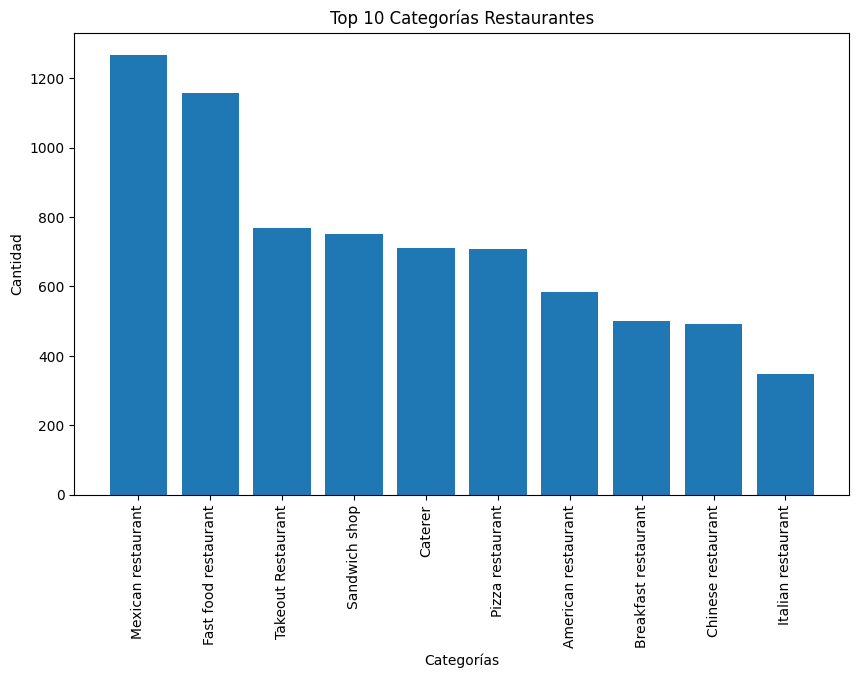

In [22]:

# Calcula el recuento de cada categoría
category_counts = separated_df['category'].value_counts()

# Define un umbral para determinar qué categorías son extremas o atípicas
umbral = 10  # Puedes ajustar este valor según tus criterios

# Filtra las categorías extremas o atípicas
extreme_categories = category_counts[(category_counts < umbral) | (category_counts > umbral)]

# Selecciona las primeras 10 categorías extremas o atípicas
top_10_extreme_categories = extreme_categories.head(10)

# Crea un nuevo DataFrame con las primeras 10 categorías extremas o atípicas y su recuento
top_10_extreme_categories_df = pd.DataFrame({'Category': top_10_extreme_categories.index, 'Count': top_10_extreme_categories.values})

# Grafica las primeras 10 categorías extremas o atípicas
plt.figure(figsize=(10, 6))
plt.bar(top_10_extreme_categories_df['Category'], top_10_extreme_categories_df['Count'])
plt.xlabel('Categorías')
plt.ylabel('Cantidad')
plt.title('Top 10 Categorías Restaurantes')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()


In [23]:
# Calcular la cantidad de nombres repetidos en cada categoría
category_name_counts = separated_df.groupby('category')['name'].nunique()

# Crear un DataFrame con los resultados
category_name_counts_df = pd.DataFrame({'Category': category_name_counts.index, 'Unique Name Count': category_name_counts.values})

# Ordenar el DataFrame por la cantidad de nombres únicos de forma descendente
category_name_counts_df = category_name_counts_df.sort_values(by='Unique Name Count', ascending=False)

# Imprimir el DataFrame
category_name_counts_df

Category  Unique Name Count
261      Mexican restaurant               1138
315        Pizza restaurant                452
83       Chinese restaurant                429
7       American restaurant                424
223     Japanese restaurant                293
..                      ...                ...
164  Food products supplier                  1
163       Food manufacturer                  1
330       Recreation center                  1
161          Food and drink                  1
431      Yucatan restaurant                  1

[432 rows x 2 columns]

In [24]:
# Calcular la cantidad de nombres repetidos en la columna 'name'
name_counts = separated_df['name'].value_counts()

# Crear un DataFrame con los resultados
name_counts_df = pd.DataFrame({'Name': name_counts.index, 'Count': name_counts.values})

# Filtrar solo los nombres que se repiten más de una vez
duplicate_names_df = name_counts_df[name_counts_df['Count'] > 1]

# Mostrar el DataFrame con los nombres repetidos
duplicate_names_df


Name  Count
0              Subway   1563
1           Starbucks    450
2           Taco Bell    277
3          McDonald's    244
4           Pizza Hut    188
...               ...    ...
2538    Buddies Pizza      2
2539       Taco Bravo      2
2540     Sanad Freeze      2
2541    Wings & Stuff      2
2542  Claws And Craws      2

[2543 rows x 2 columns]

# DATASET FINAL

In [25]:
df_parte1 = pd.read_csv('/Users/benjaminzelaya/Desktop/PGF/PG/PF_DS_REVIEWS_AND_RECOMMENDATIONS/Dataset/Union_modificado_parte1.csv')
df_parte1

Unnamed: 0                                gmap_id    Estado  \
0                0  0x8862134e67ff5c87:0x38b5e2ae99cd1fcf   Alabama   
1                1  0x8862134e67ff5c87:0x38b5e2ae99cd1fcf   Alabama   
2                2  0x886268e8fdc4fd2f:0x746533eb9aa4d4df   Alabama   
3                3  0x886268e8fdc4fd2f:0x746533eb9aa4d4df   Alabama   
4                4  0x8889aeaec69d4d49:0xb5c343f9d441acf2   Alabama   
...            ...                                    ...       ...   
542297      542297  0x87c409ca2589df8b:0x82c20df73c071457  Missouri   
542298      542298  0x87c0f5f63a4e58dd:0x8f9f3a985ea5a9ed  Missouri   
542299      542299  0x87d8b69edb190479:0xc6fb0c7b55bea607  Missouri   
542300      542300  0x87d8cacf5a8a3225:0x481f94b86a323319  Missouri   
542301      542301  0x87d8cb2abe6784c5:0x18cea93b1c38e7bc  Missouri   

                                                 category  avg_rating  \
0                                            ['Boutique']         4.6   
1                                            ['Boutique']         4.6   
2            ['Baby store', "Children's furniture store"]         3.9   
3            ['Baby store', "Children's furniture store"]         3.9   
4       ['Movie rental kiosk', 'DVD store', 'Movie ren...         3.8   
...                                                   ...         ...   
542297                                     ['Restaurant']         4.3   
542298  ['Catholic church', 'Catholic school', 'Paroch...         4.9   
542299                                      ['Locksmith']         4.4   
542300                      ['Plumber', 'Repair service']         4.7   
542301                     ['Shoe repair shop', 'Tailor']         4.3   

                                      name   latitude  longitude  
0                            Purple Peanut  34.713163 -86.574041  
1                            Purple Peanut  34.713163 -86.574041  
2                   Posh Mommy & Baby Too!  34.753758 -86.739241  
3                   Posh Mommy & Baby Too!  34.753758 -86.739241  
4                                   Redbox  33.852189 -86.816148  
...                                    ...        ...        ...  
542297                  Houndstooth Eatery  38.530549 -93.523913  
542298  St. Therese Catholic Church, North  39.219497 -94.663501  
542299            Bates Street Lock & Safe  38.518368 -90.303621  
542300     Tony LaMartina Plumbing Company  38.624763 -90.283044  
542301         Busy Bee Alterations & Shoe  38.650471 -90.339090  

[542302 rows x 8 columns]

In [26]:
df_parte1.columns


Index(['Unnamed: 0', 'gmap_id', 'Estado', 'category', 'avg_rating', 'name',
       'latitude', 'longitude'],
      dtype='object')

In [27]:
# Elimino duplicates
df_parte1.drop_duplicates(subset='latitude', inplace=True)

# Verificar el DataFrame resultante
df_parte1

Unnamed: 0                                gmap_id    Estado  \
0                0  0x8862134e67ff5c87:0x38b5e2ae99cd1fcf   Alabama   
2                2  0x886268e8fdc4fd2f:0x746533eb9aa4d4df   Alabama   
4                4  0x8889aeaec69d4d49:0xb5c343f9d441acf2   Alabama   
6                6  0x88626b2e333be6d9:0x2a00a09a7045984f   Alabama   
8                8   0x88890c0ff1fb3a1d:0x2b4463747ed6a8a   Alabama   
...            ...                                    ...       ...   
542297      542297  0x87c409ca2589df8b:0x82c20df73c071457  Missouri   
542298      542298  0x87c0f5f63a4e58dd:0x8f9f3a985ea5a9ed  Missouri   
542299      542299  0x87d8b69edb190479:0xc6fb0c7b55bea607  Missouri   
542300      542300  0x87d8cacf5a8a3225:0x481f94b86a323319  Missouri   
542301      542301  0x87d8cb2abe6784c5:0x18cea93b1c38e7bc  Missouri   

                                                 category  avg_rating  \
0                                            ['Boutique']         4.6   
2            ['Baby store', "Children's furniture store"]         3.9   
4       ['Movie rental kiosk', 'DVD store', 'Movie ren...         3.8   
6       ['Flooring store', 'Carpet store', 'Rug store'...         4.2   
8                        ['Social services organization']         4.4   
...                                                   ...         ...   
542297                                     ['Restaurant']         4.3   
542298  ['Catholic church', 'Catholic school', 'Paroch...         4.9   
542299                                      ['Locksmith']         4.4   
542300                      ['Plumber', 'Repair service']         4.7   
542301                     ['Shoe repair shop', 'Tailor']         4.3   

                                      name   latitude  longitude  
0                            Purple Peanut  34.713163 -86.574041  
2                   Posh Mommy & Baby Too!  34.753758 -86.739241  
4                                   Redbox  33.852189 -86.816148  
6              James Carpets of Huntsville  34.760510 -86.587960  
8        John Williamson Boys & Girls Club  33.651683 -86.650421  
...                                    ...        ...        ...  
542297                  Houndstooth Eatery  38.530549 -93.523913  
542298  St. Therese Catholic Church, North  39.219497 -94.663501  
542299            Bates Street Lock & Safe  38.518368 -90.303621  
542300     Tony LaMartina Plumbing Company  38.624763 -90.283044  
542301         Busy Bee Alterations & Shoe  38.650471 -90.339090  

[527179 rows x 8 columns]

In [28]:
df_parte2 = pd.read_csv('/Users/benjaminzelaya/Desktop/PGF/PG/PF_DS_REVIEWS_AND_RECOMMENDATIONS/Dataset/Union_modificado_parte2.csv')
df_parte2

Unnamed: 0                                gmap_id      Estado  \
0           542302  0x87d8cf352389e10d:0x11abff4cf57fb7a8    Missouri   
1           542303  0x87cf64abdb2d4db9:0xea5d682e1fbec1c2    Missouri   
2           542304  0x87ded19d3c06b209:0x92248013b84f5ee6    Missouri   
3           542305  0x87ded1196be078bf:0x8ab6871d9dbd234a    Missouri   
4           542306   0x87dedd5b733c996f:0x1ecd9093d6b8acd    Missouri   
...            ...                                    ...         ...   
542297     1084599  0x5490550bf74a2a4d:0xdffe9bd523a53f1e  Washington   
542298     1084600  0x5491004195a77427:0x51bf13430c3ff249  Washington   
542299     1084601  0x5491014d6fbcd7fd:0xe027823a9d0e4ecf  Washington   
542300     1084602  0x54923990302cb3c7:0x10f023b56efdb019  Washington   
542301     1084603  0x54906ab43fffffff:0x69acbd12df532b6c  Washington   

                                                 category  avg_rating  \
0                                     ['Eye care center']         4.8   
1       ['Auto repair shop', 'Auto parts store', 'Brak...         3.4   
2                                          ['Nail salon']         4.5   
3                                   ['Car rental agency']         3.1   
4                                    ['Auto repair shop']         4.9   
...                                                   ...         ...   
542297                                         ['Church']         4.6   
542298                                ['Used car dealer']         4.1   
542299                                 ['Clothing store']         4.4   
542300  ['Driver and vehicle licensing agency', 'Local...         4.3   
542301                         ['Motorcycle parts store']         4.7   

                                             name   latitude   longitude  
0                             Crown Vision Center  38.507013  -90.376491  
1                               Sears Auto Center  37.162154  -93.270335  
2                                        VN Nails  38.769306  -90.700816  
3                               Budget Car Rental  38.768932  -90.700830  
4                           A G S Automotive Inc.  38.976870  -90.740756  
...                                           ...        ...         ...  
542297                           Fellowship Group  47.253810 -122.449407  
542298                       Goodfella's Motor Co  47.193101 -122.483197  
542299                              Thrift Center  47.155134 -122.438990  
542300  Hoquiam Licensing & Transportation Agency  46.976293 -123.850030  
542301                         Dead Center Cycles  47.075371 -122.745728  

[542302 rows x 8 columns]

In [29]:
df_parte1 = pd.read_csv('/Users/benjaminzelaya/Desktop/PGF/PG/PF_DS_REVIEWS_AND_RECOMMENDATIONS/Dataset/Union_modificado_parte1.csv')
df_parte2 = pd.read_csv('/Users/benjaminzelaya/Desktop/PGF/PG/PF_DS_REVIEWS_AND_RECOMMENDATIONS/Dataset/Union_modificado_parte2.csv')

# Unir los dos DataFrames
df_final = pd.concat([df_parte1, df_parte2], ignore_index=True)

# Verificar el DataFrame resultante
df_final 

Unnamed: 0                                gmap_id      Estado  \
0                 0  0x8862134e67ff5c87:0x38b5e2ae99cd1fcf     Alabama   
1                 1  0x8862134e67ff5c87:0x38b5e2ae99cd1fcf     Alabama   
2                 2  0x886268e8fdc4fd2f:0x746533eb9aa4d4df     Alabama   
3                 3  0x886268e8fdc4fd2f:0x746533eb9aa4d4df     Alabama   
4                 4  0x8889aeaec69d4d49:0xb5c343f9d441acf2     Alabama   
...             ...                                    ...         ...   
1084599     1084599  0x5490550bf74a2a4d:0xdffe9bd523a53f1e  Washington   
1084600     1084600  0x5491004195a77427:0x51bf13430c3ff249  Washington   
1084601     1084601  0x5491014d6fbcd7fd:0xe027823a9d0e4ecf  Washington   
1084602     1084602  0x54923990302cb3c7:0x10f023b56efdb019  Washington   
1084603     1084603  0x54906ab43fffffff:0x69acbd12df532b6c  Washington   

                                                  category  avg_rating  \
0                                             ['Boutique']         4.6   
1                                             ['Boutique']         4.6   
2             ['Baby store', "Children's furniture store"]         3.9   
3             ['Baby store', "Children's furniture store"]         3.9   
4        ['Movie rental kiosk', 'DVD store', 'Movie ren...         3.8   
...                                                    ...         ...   
1084599                                         ['Church']         4.6   
1084600                                ['Used car dealer']         4.1   
1084601                                 ['Clothing store']         4.4   
1084602  ['Driver and vehicle licensing agency', 'Local...         4.3   
1084603                         ['Motorcycle parts store']         4.7   

                                              name   latitude   longitude  
0                                    Purple Peanut  34.713163  -86.574041  
1                                    Purple Peanut  34.713163  -86.574041  
2                           Posh Mommy & Baby Too!  34.753758  -86.739241  
3                           Posh Mommy & Baby Too!  34.753758  -86.739241  
4                                           Redbox  33.852189  -86.816148  
...                                            ...        ...         ...  
1084599                           Fellowship Group  47.253810 -122.449407  
1084600                       Goodfella's Motor Co  47.193101 -122.483197  
1084601                              Thrift Center  47.155134 -122.438990  
1084602  Hoquiam Licensing & Transportation Agency  46.976293 -123.850030  
1084603                         Dead Center Cycles  47.075371 -122.745728  

[1084604 rows x 8 columns]

In [30]:
# Elimino duplicates
df_final.drop_duplicates(subset='latitude', inplace=True)

# Verificar el DataFrame resultante
df_final

Unnamed: 0                                gmap_id      Estado  \
0                 0  0x8862134e67ff5c87:0x38b5e2ae99cd1fcf     Alabama   
2                 2  0x886268e8fdc4fd2f:0x746533eb9aa4d4df     Alabama   
4                 4  0x8889aeaec69d4d49:0xb5c343f9d441acf2     Alabama   
6                 6  0x88626b2e333be6d9:0x2a00a09a7045984f     Alabama   
8                 8   0x88890c0ff1fb3a1d:0x2b4463747ed6a8a     Alabama   
...             ...                                    ...         ...   
1084599     1084599  0x5490550bf74a2a4d:0xdffe9bd523a53f1e  Washington   
1084600     1084600  0x5491004195a77427:0x51bf13430c3ff249  Washington   
1084601     1084601  0x5491014d6fbcd7fd:0xe027823a9d0e4ecf  Washington   
1084602     1084602  0x54923990302cb3c7:0x10f023b56efdb019  Washington   
1084603     1084603  0x54906ab43fffffff:0x69acbd12df532b6c  Washington   

                                                  category  avg_rating  \
0                                             ['Boutique']         4.6   
2             ['Baby store', "Children's furniture store"]         3.9   
4        ['Movie rental kiosk', 'DVD store', 'Movie ren...         3.8   
6        ['Flooring store', 'Carpet store', 'Rug store'...         4.2   
8                         ['Social services organization']         4.4   
...                                                    ...         ...   
1084599                                         ['Church']         4.6   
1084600                                ['Used car dealer']         4.1   
1084601                                 ['Clothing store']         4.4   
1084602  ['Driver and vehicle licensing agency', 'Local...         4.3   
1084603                         ['Motorcycle parts store']         4.7   

                                              name   latitude   longitude  
0                                    Purple Peanut  34.713163  -86.574041  
2                           Posh Mommy & Baby Too!  34.753758  -86.739241  
4                                           Redbox  33.852189  -86.816148  
6                      James Carpets of Huntsville  34.760510  -86.587960  
8                John Williamson Boys & Girls Club  33.651683  -86.650421  
...                                            ...        ...         ...  
1084599                           Fellowship Group  47.253810 -122.449407  
1084600                       Goodfella's Motor Co  47.193101 -122.483197  
1084601                              Thrift Center  47.155134 -122.438990  
1084602  Hoquiam Licensing & Transportation Agency  46.976293 -123.850030  
1084603                         Dead Center Cycles  47.075371 -122.745728  

[1052493 rows x 8 columns]

In [31]:
df_final['category'] = df_final['category'].apply(lambda x: x.strip("[]").replace("'", "").split(", ") if isinstance(x, str) else x)

# Utilizar explode() para separar las categorías en filas individuales
separated_df_final = df_final.explode('category')

# Mostrar el nuevo DataFrame resultante
separated_df_final

Unnamed: 0                                gmap_id      Estado  \
0                 0  0x8862134e67ff5c87:0x38b5e2ae99cd1fcf     Alabama   
2                 2  0x886268e8fdc4fd2f:0x746533eb9aa4d4df     Alabama   
2                 2  0x886268e8fdc4fd2f:0x746533eb9aa4d4df     Alabama   
4                 4  0x8889aeaec69d4d49:0xb5c343f9d441acf2     Alabama   
4                 4  0x8889aeaec69d4d49:0xb5c343f9d441acf2     Alabama   
...             ...                                    ...         ...   
1084600     1084600  0x5491004195a77427:0x51bf13430c3ff249  Washington   
1084601     1084601  0x5491014d6fbcd7fd:0xe027823a9d0e4ecf  Washington   
1084602     1084602  0x54923990302cb3c7:0x10f023b56efdb019  Washington   
1084602     1084602  0x54923990302cb3c7:0x10f023b56efdb019  Washington   
1084603     1084603  0x54906ab43fffffff:0x69acbd12df532b6c  Washington   

                                    category  avg_rating  \
0                                   Boutique         4.6   
2                                 Baby store         3.9   
2                "Childrens furniture store"         3.9   
4                         Movie rental kiosk         3.8   
4                                  DVD store         3.8   
...                                      ...         ...   
1084600                      Used car dealer         4.1   
1084601                       Clothing store         4.4   
1084602  Driver and vehicle licensing agency         4.3   
1084602              Local government office         4.3   
1084603               Motorcycle parts store         4.7   

                                              name   latitude   longitude  
0                                    Purple Peanut  34.713163  -86.574041  
2                           Posh Mommy & Baby Too!  34.753758  -86.739241  
2                           Posh Mommy & Baby Too!  34.753758  -86.739241  
4                                           Redbox  33.852189  -86.816148  
4                                           Redbox  33.852189  -86.816148  
...                                            ...        ...         ...  
1084600                       Goodfella's Motor Co  47.193101 -122.483197  
1084601                              Thrift Center  47.155134 -122.438990  
1084602  Hoquiam Licensing & Transportation Agency  46.976293 -123.850030  
1084602  Hoquiam Licensing & Transportation Agency  46.976293 -123.850030  
1084603                         Dead Center Cycles  47.075371 -122.745728  

[2514949 rows x 8 columns]

In [32]:
df_poblacion = pd.read_csv('/Users/benjaminzelaya/Desktop/PGF/PG/PF_DS_REVIEWS_AND_RECOMMENDATIONS/Dataset/DataSet Population EEUU.csv')
df_poblacion

Label (Grouping)  SEX AND AGE SEX AND AGE!!Total population  \
0            Alabama          NaN                           NaN   
1           Estimate          NaN                     5,039,877   
2            Percent          NaN                     5,039,877   
3             Alaska          NaN                           NaN   
4           Estimate          NaN                       732,673   
..               ...          ...                           ...   
151         Estimate          NaN                       578,803   
152          Percent          NaN                       578,803   
153      Puerto Rico          NaN                           NaN   
154         Estimate          NaN                     3,263,584   
155          Percent          NaN                     3,263,584   

    SEX AND AGE!!Total population!!Male SEX AND AGE!!Total population!!Female  \
0                                   NaN                                   NaN   
1                             2,445,896                             2,593,981   
2                                 48.5%                                 51.5%   
3                                   NaN                                   NaN   
4                               383,121                               349,552   
..                                  ...                                   ...   
151                             296,007                               282,796   
152                               51.1%                                 48.9%   
153                                 NaN                                   NaN   
154                           1,543,991                             1,719,593   
155                               47.3%                                 52.7%   

    SEX AND AGE!!Total population!!Sex ratio (males per 100 females)  \
0                                                  NaN                 
1                                                 94.3                 
2                                                  (X)                 
3                                                  NaN                 
4                                                109.6                 
..                                                 ...                 
151                                              104.7                 
152                                                (X)                 
153                                                NaN                 
154                                               89.8                 
155                                                (X)                 

    SEX AND AGE!!Total population!!Under 5 years  \
0                                            NaN   
1                                        290,091   
2                                           5.8%   
3                                            NaN   
4                                         46,198   
..                                           ...   
151                                       30,233   
152                                         5.2%   
153                                          NaN   
154                                      103,841   
155                                         3.2%   

    SEX AND AGE!!Total population!!5 to 9 years  \
0                                           NaN   
1                                       298,540   
2                                          5.9%   
3                                           NaN   
4                                        52,071   
..                                          ...   
151                                      36,056   
152                                        6.2%   
153                                         NaN   
154                                     150,197   
155                                        4.6%   

    SEX AND AGE!!Total population!!10 to 14 years  \
0                                             NaN   
1                

In [33]:
print(df_poblacion.columns)

Index(['Label (Grouping)', 'SEX AND AGE', 'SEX AND AGE!!Total population',
       'SEX AND AGE!!Total population!!Male',
       'SEX AND AGE!!Total population!!Female',
       'SEX AND AGE!!Total population!!Sex ratio (males per 100 females)',
       'SEX AND AGE!!Total population!!Under 5 years',
       'SEX AND AGE!!Total population!!5 to 9 years',
       'SEX AND AGE!!Total population!!10 to 14 years',
       'SEX AND AGE!!Total population!!15 to 19 years',
       'SEX AND AGE!!Total population!!20 to 24 years',
       'SEX AND AGE!!Total population!!25 to 34 years',
       'SEX AND AGE!!Total population!!35 to 44 years',
       'SEX AND AGE!!Total population!!45 to 54 years',
       'SEX AND AGE!!Total population!!55 to 59 years',
       'SEX AND AGE!!Total population!!60 to 64 years',
       'SEX AND AGE!!Total population!!65 to 74 years',
       'SEX AND AGE!!Total population!!75 to 84 years',
       'SEX AND AGE!!Total population!!85 years and over',
       'SEX AND AGE!!Total p

In [34]:
df_poblacion

Label (Grouping)  SEX AND AGE SEX AND AGE!!Total population  \
0            Alabama          NaN                           NaN   
1           Estimate          NaN                     5,039,877   
2            Percent          NaN                     5,039,877   
3             Alaska          NaN                           NaN   
4           Estimate          NaN                       732,673   
..               ...          ...                           ...   
151         Estimate          NaN                       578,803   
152          Percent          NaN                       578,803   
153      Puerto Rico          NaN                           NaN   
154         Estimate          NaN                     3,263,584   
155          Percent          NaN                     3,263,584   

    SEX AND AGE!!Total population!!Male SEX AND AGE!!Total population!!Female  \
0                                   NaN                                   NaN   
1                             2,445,896                             2,593,981   
2                                 48.5%                                 51.5%   
3                                   NaN                                   NaN   
4                               383,121                               349,552   
..                                  ...                                   ...   
151                             296,007                               282,796   
152                               51.1%                                 48.9%   
153                                 NaN                                   NaN   
154                           1,543,991                             1,719,593   
155                               47.3%                                 52.7%   

    SEX AND AGE!!Total population!!Sex ratio (males per 100 females)  \
0                                                  NaN                 
1                                                 94.3                 
2                                                  (X)                 
3                                                  NaN                 
4                                                109.6                 
..                                                 ...                 
151                                              104.7                 
152                                                (X)                 
153                                                NaN                 
154                                               89.8                 
155                                                (X)                 

    SEX AND AGE!!Total population!!Under 5 years  \
0                                            NaN   
1                                        290,091   
2                                           5.8%   
3                                            NaN   
4                                         46,198   
..                                           ...   
151                                       30,233   
152                                         5.2%   
153                                          NaN   
154                                      103,841   
155                                         3.2%   

    SEX AND AGE!!Total population!!5 to 9 years  \
0                                           NaN   
1                                       298,540   
2                                          5.9%   
3                                           NaN   
4                                        52,071   
..                                          ...   
151                                      36,056   
152                                        6.2%   
153                                         NaN   
154                                     150,197   
155                                        4.6%   

    SEX AND AGE!!Total population!!10 to 14 years  \
0                                             NaN   
1                

In [35]:
df_poblacion = df_poblacion.drop(columns=['SEX AND AGE'])


In [36]:
nuevos_nombres = {col: col.replace("SEX AND AGE", "") for col in df_poblacion.columns}

# Renombra las columnas del DataFrame usando el diccionario
df_poblacion.rename(columns=nuevos_nombres, inplace=True)
nuevos_nombres = {col: col.replace("!!", " ") for col in df_poblacion.columns}

# Renombra las columnas del DataFrame usando el diccionario
df_poblacion.rename(columns=nuevos_nombres, inplace=True)

In [37]:
df_poblacion

Label (Grouping)  Total population  Total population Male  \
0            Alabama               NaN                    NaN   
1           Estimate         5,039,877              2,445,896   
2            Percent         5,039,877                  48.5%   
3             Alaska               NaN                    NaN   
4           Estimate           732,673                383,121   
..               ...               ...                    ...   
151         Estimate           578,803                296,007   
152          Percent           578,803                  51.1%   
153      Puerto Rico               NaN                    NaN   
154         Estimate         3,263,584              1,543,991   
155          Percent         3,263,584                  47.3%   

     Total population Female  \
0                        NaN   
1                  2,593,981   
2                      51.5%   
3                        NaN   
4                    349,552   
..                       ...   
151                  282,796   
152                    48.9%   
153                      NaN   
154                1,719,593   
155                    52.7%   

     Total population Sex ratio (males per 100 females)  \
0                                                  NaN    
1                                                 94.3    
2                                                  (X)    
3                                                  NaN    
4                                                109.6    
..                                                 ...    
151                                              104.7    
152                                                (X)    
153                                                NaN    
154                                               89.8    
155                                                (X)    

     Total population Under 5 years  Total population 5 to 9 years  \
0                               NaN                            NaN   
1                           290,091                        298,540   
2                              5.8%                           5.9%   
3                               NaN                            NaN   
4                            46,198                         52,071   
..                              ...                            ...   
151                          30,233                         36,056   
152                            5.2%                           6.2%   
153                             NaN                            NaN   
154                         103,841                        150,197   
155                            3.2%                           4.6%   

     Total population 10 to 14 years  Total population 15 to 19 years  \
0                                NaN                              NaN   
1                            337,730                          338,347   
2                               6.7%                             6.7%   
3                                NaN                              NaN   
4                             52,507                           50,263   
..                               ...                              ...   
151                           41,288                           40,161   
152                             7.1%                             6.9%   
153                              NaN                              NaN   
154                          176,442                          205,814   
155                             5.4%                             6.3%   

     Total population 20 to 24 years  Total population 25 to 34 years  \
0                                NaN                              NaN   
1                            323,961                          633,583   
2                               6.4%                            12.6%   
3                                NaN                              NaN   
4                             45,855          

In [38]:
# Aquí seleccionamos todas las columnas hasta la 5ta.
nombres_columnas = df_poblacion.columns.tolist() 
df_poblacion = df_poblacion.drop(df_poblacion.columns[5:18], axis=1)


In [39]:
df_poblacion = df_poblacion.drop(df_poblacion.columns[10:], axis=1)

In [40]:
df_poblacion.iloc[:, 1:] = df_poblacion.iloc[:, 1:].apply(lambda x: x.shift(-1))
df_poblacion = df_poblacion.iloc[::3]
df_poblacion = df_poblacion.reset_index(drop=True)

In [41]:
df_poblacion

Label (Grouping)  Total population  Total population Male  \
0                Alabama         5,039,877              2,445,896   
1                 Alaska           732,673                383,121   
2                Arizona         7,276,316              3,629,620   
3               Arkansas         3,025,891              1,493,681   
4             California        39,237,836             19,618,934   
5               Colorado         5,812,069              2,943,037   
6            Connecticut         3,605,597              1,768,045   
7               Delaware         1,003,384                485,908   
8   District of Columbia           670,050                319,025   
9                Florida        21,781,128             10,714,520   
10               Georgia        10,799,566              5,270,144   
11                Hawaii         1,441,553                725,604   
12                 Idaho         1,900,923                954,313   
13              Illinois        12,671,469              6,264,364   
14               Indiana         6,805,985              3,374,931   
15                  Iowa         3,193,079              1,603,267   
16                Kansas         2,934,582              1,474,610   
17              Kentucky         4,509,394              2,229,328   
18             Louisiana         4,624,047              2,260,866   
19                 Maine         1,372,247                673,483   
20              Maryland         6,165,129              3,003,091   
21         Massachusetts         6,984,723              3,408,252   
22              Michigan        10,050,811              4,976,869   
23             Minnesota         5,707,390              2,860,668   
24           Mississippi         2,949,965              1,435,423   
25              Missouri         6,168,187              3,045,181   
26               Montana         1,104,271                560,911   
27              Nebraska         1,963,692                986,019   
28                Nevada         3,143,991              1,585,207   
29         New Hampshire         1,388,992                693,234   
30            New Jersey         9,267,130              4,563,560   
31            New Mexico         2,115,877              1,052,355   
32              New York        19,835,913              9,696,573   
33        North Carolina        10,551,162              5,149,323   
34          North Dakota           774,948                399,544   
35                  Ohio        11,780,017              5,808,575   
36              Oklahoma         3,986,639              1,984,707   
37                Oregon         4,246,155              2,121,532   
38          Pennsylvania        12,964,056              6,399,632   
39          Rhode Island         1,095,610                536,589   
40        South Carolina         5,190,705              2,521,689   
41          South Dakota           895,376                451,950   
42             Tennessee         6,975,218              3,413,181   
43                 Texas        29,527,941             14,739,011   
44                  Utah         3,337,975              1,694,770   
45               Vermont           645,570                320,293   
46              Virginia         8,642,274              4,273,931   
47            Washington         7,738,692              3,897,320   
48         West Virginia         1,782,959                887,360   
49             Wisconsin         5,895,908              2,955,249   
50               Wyoming           578,803                296,007   
51           Puerto Rico         3,263,584              1,543,991   

    Total population Female  \
0                 2,593,981   
1                   349,552   
2                 3,646,696   
3                 1,532,210   
4                19,618,902   
5                 2,869,032   
6                 1,837,552   
7                   517,476   
8                   351,025   
9                11,066,608   
10       

In [42]:
df_poblacion.rename(columns={'Label (Grouping)': 'Estado'}, inplace=True)
df_poblacion

Estado  Total population  Total population Male  \
0                Alabama         5,039,877              2,445,896   
1                 Alaska           732,673                383,121   
2                Arizona         7,276,316              3,629,620   
3               Arkansas         3,025,891              1,493,681   
4             California        39,237,836             19,618,934   
5               Colorado         5,812,069              2,943,037   
6            Connecticut         3,605,597              1,768,045   
7               Delaware         1,003,384                485,908   
8   District of Columbia           670,050                319,025   
9                Florida        21,781,128             10,714,520   
10               Georgia        10,799,566              5,270,144   
11                Hawaii         1,441,553                725,604   
12                 Idaho         1,900,923                954,313   
13              Illinois        12,671,469              6,264,364   
14               Indiana         6,805,985              3,374,931   
15                  Iowa         3,193,079              1,603,267   
16                Kansas         2,934,582              1,474,610   
17              Kentucky         4,509,394              2,229,328   
18             Louisiana         4,624,047              2,260,866   
19                 Maine         1,372,247                673,483   
20              Maryland         6,165,129              3,003,091   
21         Massachusetts         6,984,723              3,408,252   
22              Michigan        10,050,811              4,976,869   
23             Minnesota         5,707,390              2,860,668   
24           Mississippi         2,949,965              1,435,423   
25              Missouri         6,168,187              3,045,181   
26               Montana         1,104,271                560,911   
27              Nebraska         1,963,692                986,019   
28                Nevada         3,143,991              1,585,207   
29         New Hampshire         1,388,992                693,234   
30            New Jersey         9,267,130              4,563,560   
31            New Mexico         2,115,877              1,052,355   
32              New York        19,835,913              9,696,573   
33        North Carolina        10,551,162              5,149,323   
34          North Dakota           774,948                399,544   
35                  Ohio        11,780,017              5,808,575   
36              Oklahoma         3,986,639              1,984,707   
37                Oregon         4,246,155              2,121,532   
38          Pennsylvania        12,964,056              6,399,632   
39          Rhode Island         1,095,610                536,589   
40        South Carolina         5,190,705              2,521,689   
41          South Dakota           895,376                451,950   
42             Tennessee         6,975,218              3,413,181   
43                 Texas        29,527,941             14,739,011   
44                  Utah         3,337,975              1,694,770   
45               Vermont           645,570                320,293   
46              Virginia         8,642,274              4,273,931   
47            Washington         7,738,692              3,897,320   
48         West Virginia         1,782,959                887,360   
49             Wisconsin         5,895,908              2,955,249   
50               Wyoming           578,803                296,007   
51           Puerto Rico         3,263,584              1,543,991   

    Total population Female  \
0                 2,593,981   
1                   349,552   
2                 3,646,696   
3                 1,532,210   
4                19,618,902   
5                 2,869,032   
6                 1,837,552   
7                   517,476   
8                   351,025   
9                11,066,608   
10                5

In [43]:
df_poblacion.columns

Index(['Estado', ' Total population', ' Total population Male',
       ' Total population Female',
       ' Total population Sex ratio (males per 100 females)',
       ' Total population Median age (years)',
       ' Total population Under 18 years',
       ' Total population 16 years and over',
       ' Total population 18 years and over',
       ' Total population 21 years and over'],
      dtype='object')

In [44]:
# Crear un nuevo DataFrame con las columnas 'Estado' y 'Total population'
df_poblacion_final = df_poblacion[['Estado', ' Total population']].copy()

# Mostrar el nuevo DataFrame
df_poblacion_final

Estado  Total population
0                Alabama         5,039,877
1                 Alaska           732,673
2                Arizona         7,276,316
3               Arkansas         3,025,891
4             California        39,237,836
5               Colorado         5,812,069
6            Connecticut         3,605,597
7               Delaware         1,003,384
8   District of Columbia           670,050
9                Florida        21,781,128
10               Georgia        10,799,566
11                Hawaii         1,441,553
12                 Idaho         1,900,923
13              Illinois        12,671,469
14               Indiana         6,805,985
15                  Iowa         3,193,079
16                Kansas         2,934,582
17              Kentucky         4,509,394
18             Louisiana         4,624,047
19                 Maine         1,372,247
20              Maryland         6,165,129
21         Massachusetts         6,984,723
22              Michigan        10,050,811
23             Minnesota         5,707,390
24           Mississippi         2,949,965
25              Missouri         6,168,187
26               Montana         1,104,271
27              Nebraska         1,963,692
28                Nevada         3,143,991
29         New Hampshire         1,388,992
30            New Jersey         9,267,130
31            New Mexico         2,115,877
32              New York        19,835,913
33        North Carolina        10,551,162
34          North Dakota           774,948
35                  Ohio        11,780,017
36              Oklahoma         3,986,639
37                Oregon         4,246,155
38          Pennsylvania        12,964,056
39          Rhode Island         1,095,610
40        South Carolina         5,190,705
41          South Dakota           895,376
42             Tennessee         6,975,218
43                 Texas        29,527,941
44                  Utah         3,337,975
45               Vermont           645,570
46              Virginia         8,642,274
47            Washington         7,738,692
48         West Virginia         1,782,959
49             Wisconsin         5,895,908
50               Wyoming           578,803
51           Puerto Rico         3,263,584

In [45]:
df_poblacion_final.columns

Index(['Estado', ' Total population'], dtype='object')

In [46]:
# df_poblacion_final.to_csv('Population', index= False)   

# Vamos a unir el dataframde de poblacion con el dataframe original

In [47]:
df_final.columns

Index(['Unnamed: 0', 'gmap_id', 'Estado', 'category', 'avg_rating', 'name',
       'latitude', 'longitude'],
      dtype='object')

In [48]:

# Unir los DataFrames en función de la columna 'Estado'
df_completo = df_final.merge(df_poblacion, on='Estado', how='inner')

# Verificar el DataFrame resultante
df_completo


Unnamed: 0                                gmap_id      Estado  \
0                0  0x8862134e67ff5c87:0x38b5e2ae99cd1fcf     Alabama   
1                2  0x886268e8fdc4fd2f:0x746533eb9aa4d4df     Alabama   
2                4  0x8889aeaec69d4d49:0xb5c343f9d441acf2     Alabama   
3                6  0x88626b2e333be6d9:0x2a00a09a7045984f     Alabama   
4                8   0x88890c0ff1fb3a1d:0x2b4463747ed6a8a     Alabama   
...            ...                                    ...         ...   
867085     1084599  0x5490550bf74a2a4d:0xdffe9bd523a53f1e  Washington   
867086     1084600  0x5491004195a77427:0x51bf13430c3ff249  Washington   
867087     1084601  0x5491014d6fbcd7fd:0xe027823a9d0e4ecf  Washington   
867088     1084602  0x54923990302cb3c7:0x10f023b56efdb019  Washington   
867089     1084603  0x54906ab43fffffff:0x69acbd12df532b6c  Washington   

                                                 category  avg_rating  \
0                                              [Boutique]         4.6   
1               [Baby store, "Childrens furniture store"]         3.9   
2       [Movie rental kiosk, DVD store, Movie rental s...         3.8   
3       [Flooring store, Carpet store, Rug store, Wood...         4.2   
4                          [Social services organization]         4.4   
...                                                   ...         ...   
867085                                           [Church]         4.6   
867086                                  [Used car dealer]         4.1   
867087                                   [Clothing store]         4.4   
867088  [Driver and vehicle licensing agency, Local go...         4.3   
867089                           [Motorcycle parts store]         4.7   

                                             name   latitude   longitude  \
0                                   Purple Peanut  34.713163  -86.574041   
1                          Posh Mommy & Baby Too!  34.753758  -86.739241   
2                                          Redbox  33.852189  -86.816148   
3                     James Carpets of Huntsville  34.760510  -86.587960   
4               John Williamson Boys & Girls Club  33.651683  -86.650421   
...                                           ...        ...         ...   
867085                           Fellowship Group  47.253810 -122.449407   
867086                       Goodfella's Motor Co  47.193101 -122.483197   
867087                              Thrift Center  47.155134 -122.438990   
867088  Hoquiam Licensing & Transportation Agency  46.976293 -123.850030   
867089                         Dead Center Cycles  47.075371 -122.745728   

        Total population  Total population Male  Total population Female  \
0              5,039,877              2,445,896                2,593,981   
1              5,039,877              2,445,896                2,593,981   
2              5,039,877              2,445,896                2,593,981   
3              5,039,877              2,445,896                2,593,981   
4              5,039,877              2,445,896                2,593,981   
...                  ...                    ...                      ...   
867085         7,738,692              3,897,320                3,841,372   
867086         7,738,692              3,897,320                3,841,372   
867087         7,738,692              3,897,320                3,841,372   
867088         7,738,692              3,897,320                3,841,372   
867089         7,738,692              3,897,320                3,841,372   

        Total population Sex ratio (males per 100 females)  \
0                                                    94.3    
1                                                    94.3    
2                                                    94.3    
3                                                    94.3    
4                                                    94.3    
...                                                   ..

In [49]:
columnas_a_eliminar = [
    ' Total population',
    ' Total population Male',
    ' Total population Female',
    ' Total population Sex ratio (males per 100 females)',
    ' Total population Median age (years)',
    ' Total population Under 18 years',
    ' Total population 16 years and over',
    ' Total population 18 years and over',
    ' Total population 21 years and over'
]

df_completo = df_completo.drop(columns=columnas_a_eliminar)

# Verificar el DataFrame resultante
print(df_completo)



        Unnamed: 0                                gmap_id      Estado  \
0                0  0x8862134e67ff5c87:0x38b5e2ae99cd1fcf     Alabama   
1                2  0x886268e8fdc4fd2f:0x746533eb9aa4d4df     Alabama   
2                4  0x8889aeaec69d4d49:0xb5c343f9d441acf2     Alabama   
3                6  0x88626b2e333be6d9:0x2a00a09a7045984f     Alabama   
4                8   0x88890c0ff1fb3a1d:0x2b4463747ed6a8a     Alabama   
...            ...                                    ...         ...   
867085     1084599  0x5490550bf74a2a4d:0xdffe9bd523a53f1e  Washington   
867086     1084600  0x5491004195a77427:0x51bf13430c3ff249  Washington   
867087     1084601  0x5491014d6fbcd7fd:0xe027823a9d0e4ecf  Washington   
867088     1084602  0x54923990302cb3c7:0x10f023b56efdb019  Washington   
867089     1084603  0x54906ab43fffffff:0x69acbd12df532b6c  Washington   

                                                 category  avg_rating  \
0                                              [Bo

In [50]:
# Renombrar el DataFrame df_completo como df_eda
df_eda = df_completo.copy() 

# Guardar el DataFrame en un archivo CSV
df_eda.to_csv('df_eda.csv', index=False)  

In [51]:
df_eda

Unnamed: 0                                gmap_id      Estado  \
0                0  0x8862134e67ff5c87:0x38b5e2ae99cd1fcf     Alabama   
1                2  0x886268e8fdc4fd2f:0x746533eb9aa4d4df     Alabama   
2                4  0x8889aeaec69d4d49:0xb5c343f9d441acf2     Alabama   
3                6  0x88626b2e333be6d9:0x2a00a09a7045984f     Alabama   
4                8   0x88890c0ff1fb3a1d:0x2b4463747ed6a8a     Alabama   
...            ...                                    ...         ...   
867085     1084599  0x5490550bf74a2a4d:0xdffe9bd523a53f1e  Washington   
867086     1084600  0x5491004195a77427:0x51bf13430c3ff249  Washington   
867087     1084601  0x5491014d6fbcd7fd:0xe027823a9d0e4ecf  Washington   
867088     1084602  0x54923990302cb3c7:0x10f023b56efdb019  Washington   
867089     1084603  0x54906ab43fffffff:0x69acbd12df532b6c  Washington   

                                                 category  avg_rating  \
0                                              [Boutique]         4.6   
1               [Baby store, "Childrens furniture store"]         3.9   
2       [Movie rental kiosk, DVD store, Movie rental s...         3.8   
3       [Flooring store, Carpet store, Rug store, Wood...         4.2   
4                          [Social services organization]         4.4   
...                                                   ...         ...   
867085                                           [Church]         4.6   
867086                                  [Used car dealer]         4.1   
867087                                   [Clothing store]         4.4   
867088  [Driver and vehicle licensing agency, Local go...         4.3   
867089                           [Motorcycle parts store]         4.7   

                                             name   latitude   longitude  
0                                   Purple Peanut  34.713163  -86.574041  
1                          Posh Mommy & Baby Too!  34.753758  -86.739241  
2                                          Redbox  33.852189  -86.816148  
3                     James Carpets of Huntsville  34.760510  -86.587960  
4               John Williamson Boys & Girls Club  33.651683  -86.650421  
...                                           ...        ...         ...  
867085                           Fellowship Group  47.253810 -122.449407  
867086                       Goodfella's Motor Co  47.193101 -122.483197  
867087                              Thrift Center  47.155134 -122.438990  
867088  Hoquiam Licensing & Transportation Agency  46.976293 -123.850030  
867089                         Dead Center Cycles  47.075371 -122.745728  

[867090 rows x 8 columns]

In [52]:
df_eda['category'] = df_eda['category'].apply(lambda x: x.strip("[]").replace("'", "").split(", ") if isinstance(x, str) else x)

# Utilizar explode() para separar las categorías en filas individuales
restaurant_df_eda= df_eda.explode('category')

# Mostrar el nuevo DataFrame resultante
restaurant_df_eda

Unnamed: 0                                gmap_id      Estado  \
0                0  0x8862134e67ff5c87:0x38b5e2ae99cd1fcf     Alabama   
1                2  0x886268e8fdc4fd2f:0x746533eb9aa4d4df     Alabama   
1                2  0x886268e8fdc4fd2f:0x746533eb9aa4d4df     Alabama   
2                4  0x8889aeaec69d4d49:0xb5c343f9d441acf2     Alabama   
2                4  0x8889aeaec69d4d49:0xb5c343f9d441acf2     Alabama   
...            ...                                    ...         ...   
867086     1084600  0x5491004195a77427:0x51bf13430c3ff249  Washington   
867087     1084601  0x5491014d6fbcd7fd:0xe027823a9d0e4ecf  Washington   
867088     1084602  0x54923990302cb3c7:0x10f023b56efdb019  Washington   
867088     1084602  0x54923990302cb3c7:0x10f023b56efdb019  Washington   
867089     1084603  0x54906ab43fffffff:0x69acbd12df532b6c  Washington   

                                   category  avg_rating  \
0                                  Boutique         4.6   
1                                Baby store         3.9   
1               "Childrens furniture store"         3.9   
2                        Movie rental kiosk         3.8   
2                                 DVD store         3.8   
...                                     ...         ...   
867086                      Used car dealer         4.1   
867087                       Clothing store         4.4   
867088  Driver and vehicle licensing agency         4.3   
867088              Local government office         4.3   
867089               Motorcycle parts store         4.7   

                                             name   latitude   longitude  
0                                   Purple Peanut  34.713163  -86.574041  
1                          Posh Mommy & Baby Too!  34.753758  -86.739241  
1                          Posh Mommy & Baby Too!  34.753758  -86.739241  
2                                          Redbox  33.852189  -86.816148  
2                                          Redbox  33.852189  -86.816148  
...                                           ...        ...         ...  
867086                       Goodfella's Motor Co  47.193101 -122.483197  
867087                              Thrift Center  47.155134 -122.438990  
867088  Hoquiam Licensing & Transportation Agency  46.976293 -123.850030  
867088  Hoquiam Licensing & Transportation Agency  46.976293 -123.850030  
867089                         Dead Center Cycles  47.075371 -122.745728  

[2077360 rows x 8 columns]

In [53]:
# Llenar los valores NaN en la columna 'category' con una cadena vacía
restaurant_df_eda['category'] = restaurant_df_eda['category'].fillna('')

# Filtrar filas donde la columna 'category' contiene la palabra 'restaurant'
restaurant_df = restaurant_df_eda[restaurant_df_eda['category'].str.contains('restaurant')]

# Mostrar el DataFrame resultante
restaurant_df


Unnamed: 0                                gmap_id      Estado  \
6               12  0x8889221157fb3455:0x5c125c40c3eccc2a     Alabama   
7               14  0x88892bb449d44cb3:0x7beaf0b2e3171a49     Alabama   
7               14  0x88892bb449d44cb3:0x7beaf0b2e3171a49     Alabama   
9               18  0x888cedd24b6af451:0x9958558c300844df     Alabama   
9               18  0x888cedd24b6af451:0x9958558c300844df     Alabama   
...            ...                                    ...         ...   
867022     1084536  0x5484dc6cf214971d:0xa2eba48db316e005  Washington   
867028     1084542  0x5362240bf2b1e7b5:0xcbc6b7a3acd302b9  Washington   
867028     1084542  0x5362240bf2b1e7b5:0xcbc6b7a3acd302b9  Washington   
867031     1084545  0x549007ac435e001d:0xc180eee6ba73b7ef  Washington   
867040     1084554  0x54906ff2af973d71:0x552e8f142c66e8a7  Washington   

                        category  avg_rating  \
6               Pizza restaurant         4.1   
7       Chicken wings restaurant         3.2   
7               Pizza restaurant         3.2   
9        Asian fusion restaurant         4.0   
9             Dessert restaurant         4.0   
...                          ...         ...   
867022   Country food restaurant         4.2   
867028          Pizza restaurant         4.1   
867028        Italian restaurant         4.1   
867031          Sushi restaurant         4.6   
867040      Fast food restaurant         3.8   

                                                   name   latitude   longitude  
6       California Pizza Kitchen at Riverchase Galleria  33.381416  -86.807040  
7                                             Pizza Hut  33.100547  -86.861968  
7                                             Pizza Hut  33.100547  -86.861968  
9                                               Cheetos  32.631013  -85.437473  
9                                               Cheetos  32.631013  -85.437473  
...                                                 ...        ...         ...  
867022                     Glacier Peak Resort & Winery  48.512617 -121.469734  
867028                                    Newport Pizza  48.179205 -117.044331  
867028                                    Newport Pizza  48.179205 -117.044331  
867031                      Fatty Fish Sushi Restaurant  47.878470 -122.166333  
867040                                     Jimmy John's  47.543108 -122.019312  

[117559 rows x 8 columns]

In [54]:
# Guardar el DataFrame en un archivo CSV
restaurant_df.to_csv('restaurant_df.csv', index=False)  

# LOS 5 ESTADOS DE MAYOR POBLACION DE LOS ESTADOS UNIDOS

In [55]:
df_poblacion_final.rename(columns={' Total population': 'Total population'}, inplace=True)

# Ahora puedes realizar las operaciones sobre la columna 'Total population'
df_poblacion_final['Total population'] = df_poblacion_final['Total population'].str.replace(',', '').astype(int)

# Encontrar los 5 estados con la población más alta
top_5_estados = df_poblacion_final.nlargest(5, 'Total population')

# Mostrar los resultados
print(top_5_estados[['Estado', 'Total population']])


          Estado  Total population
4     California          39237836
43         Texas          29527941
9        Florida          21781128
32      New York          19835913
38  Pennsylvania          12964056


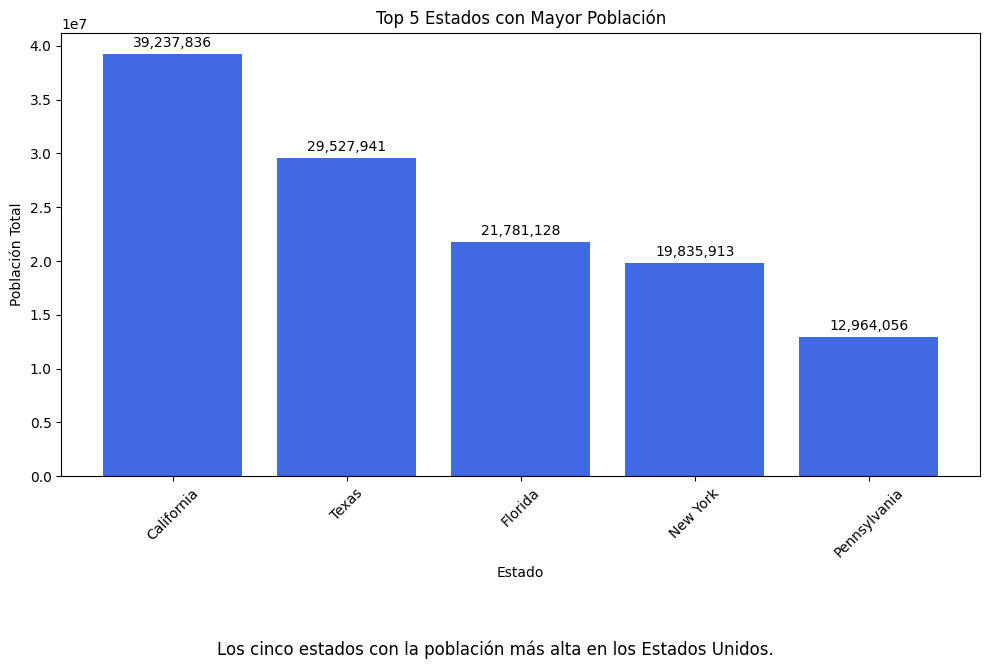

In [56]:


# Ordena los estados por población en orden descendente y toma los 5 primeros
top_5_estados = df_poblacion_final.sort_values(by='Total population', ascending=False).head(5)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_estados['Estado'], top_5_estados['Total population'], color='royalblue')
plt.title('Top 5 Estados con Mayor Población')
plt.xlabel('Estado')
plt.ylabel('Población Total')
plt.xticks(rotation=45)

# Agregar el número exacto de habitantes encima de cada barra
for bar, poblacion in zip(bars, top_5_estados['Total population']):
    plt.annotate(f'{poblacion:,.0f}',  # Mostrar el valor sin decimales
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3),  # Offset vertical para la etiqueta
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10, color='black')

# Agregar una descripción debajo del gráfico
plt.figtext(0.5, -0.1, 'Los cinco estados con la población más alta en los Estados Unidos.', ha='center', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()




# DATAFRAME DE LOS ESTADOS CON MAYOR POBLACION

In [74]:
# Estados que deseas incluir
estados_deseados = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania']

# Filtrar el DataFrame para incluir solo los estados deseados
Estados_mayor_poblacion_df = restaurant_df[restaurant_df['Estado'].isin(estados_deseados)]

# Mostrar los resultados
print(Estados_mayor_poblacion_df)


        Unnamed: 0                                gmap_id      Estado  \
59247        60886  0x80c2c778e3b73d33:0xbdc58662a4a97d49  California   
59328        61048  0x80c2d765f8c90a3d:0x16afb75943e7ad50  California   
59328        61048  0x80c2d765f8c90a3d:0x16afb75943e7ad50  California   
59328        61048  0x80c2d765f8c90a3d:0x16afb75943e7ad50  California   
59328        61048  0x80c2d765f8c90a3d:0x16afb75943e7ad50  California   
...            ...                                    ...         ...   
790933     1005782  0x86e75a4857e88033:0xb2d39977d7d1fc51       Texas   
790938     1005787  0x864120652a476167:0x5b7287ba9d8629fd       Texas   
790953     1005802   0x86e70c40feea06db:0x1175307d1fb16a1       Texas   
790964     1005813  0x865c6739f9f68e07:0x9e6d0a0130649920       Texas   
790980     1005829  0x863f79137a27e1e7:0x5e916e7fe74dcff5       Texas   

                     category  avg_rating                          name  \
59247       Korean restaurant         4.4       

In [75]:
Estados_mayor_poblacion_df

Unnamed: 0                                gmap_id      Estado  \
59247        60886  0x80c2c778e3b73d33:0xbdc58662a4a97d49  California   
59328        61048  0x80c2d765f8c90a3d:0x16afb75943e7ad50  California   
59328        61048  0x80c2d765f8c90a3d:0x16afb75943e7ad50  California   
59328        61048  0x80c2d765f8c90a3d:0x16afb75943e7ad50  California   
59328        61048  0x80c2d765f8c90a3d:0x16afb75943e7ad50  California   
...            ...                                    ...         ...   
790933     1005782  0x86e75a4857e88033:0xb2d39977d7d1fc51       Texas   
790938     1005787  0x864120652a476167:0x5b7287ba9d8629fd       Texas   
790953     1005802   0x86e70c40feea06db:0x1175307d1fb16a1       Texas   
790964     1005813  0x865c6739f9f68e07:0x9e6d0a0130649920       Texas   
790980     1005829  0x863f79137a27e1e7:0x5e916e7fe74dcff5       Texas   

                     category  avg_rating                          name  \
59247       Korean restaurant         4.4                  San Soo Dang   
59328    Hamburger restaurant         3.7          Cowboy Burgers & BBQ   
59328     American restaurant         3.7          Cowboy Burgers & BBQ   
59328     Barbecue restaurant         3.7          Cowboy Burgers & BBQ   
59328    Fast food restaurant         3.7          Cowboy Burgers & BBQ   
...                       ...         ...                           ...   
790933  Vietnamese restaurant         3.0                 Little Saigon   
790938    Barbecue restaurant         3.9               Brookstreet BBQ   
790953     Mexican restaurant         4.4                     La Calesa   
790964       Pizza restaurant         4.3  Peppe & Ronni New York Pizza   
790980     Chinese restaurant         2.9         Lee's Oriental Buffet   

         latitude   longitude  
59247   34.058092 -118.292130  
59328   34.079995 -117.988951  
59328   34.079995 -117.988951  
59328   34.079995 -117.988951  
59328   34.079995 -117.988951  
...           ...         ...  
790933  31.786389 -106.413611  
790938  29.702256  -95.740719  
790953  31.442794 -106.090729  
790964  29.539961  -98.583990  
790980  29.393558  -94.948111  

[32640 rows x 8 columns]

In [76]:
# Guardar el DataFrame en un archivo CSV
Estados_mayor_poblacion_df.to_csv('Estados_mayor_poblacion_df.csv', index=False)  

# Los 5 Estados de poblacion Intermedia:

In [57]:
df_poblacion_final = df_poblacion_final.sort_values(by='Total population')

# Calcular la población intermedia
poblacion_intermedia = df_poblacion_final['Total population'].iloc[len(df_poblacion_final) // 2]

print("Población intermedia:", poblacion_intermedia)



Población intermedia: 4509394


In [62]:
# Calcular la población intermedia
poblacion_intermedia = df_poblacion_final['Total population'].iloc[len(df_poblacion_final) // 2]

print("Población intermedia:", poblacion_intermedia)

# Calcular la diferencia absoluta entre la población de cada estado y la población intermedia
df_poblacion_final['Diferencia'] = abs(df_poblacion_final['Total population'] - poblacion_intermedia)

# Ordenar el DataFrame por la columna 'Diferencia' y tomar los 5 estados con las diferencias más pequeñas
top_5_estados_intermedios = df_poblacion_final.sort_values(by='Diferencia').head(5)

# Eliminar la columna 'Diferencia' del DataFrame resultante
top_5_estados_intermedios = top_5_estados_intermedios.drop(columns='Diferencia')

# Mostrar el DataFrame resultante
print(top_5_estados_intermedios[['Estado', 'Total population']])


Población intermedia: 4509394
       Estado  Total population
17   Kentucky           4509394
18  Louisiana           4624047
37     Oregon           4246155
36   Oklahoma           3986639
0     Alabama           5039877


In [65]:
top_5_estados_intermedios

Estado  Total population
17   Kentucky           4509394
18  Louisiana           4624047
37     Oregon           4246155
36   Oklahoma           3986639
0     Alabama           5039877

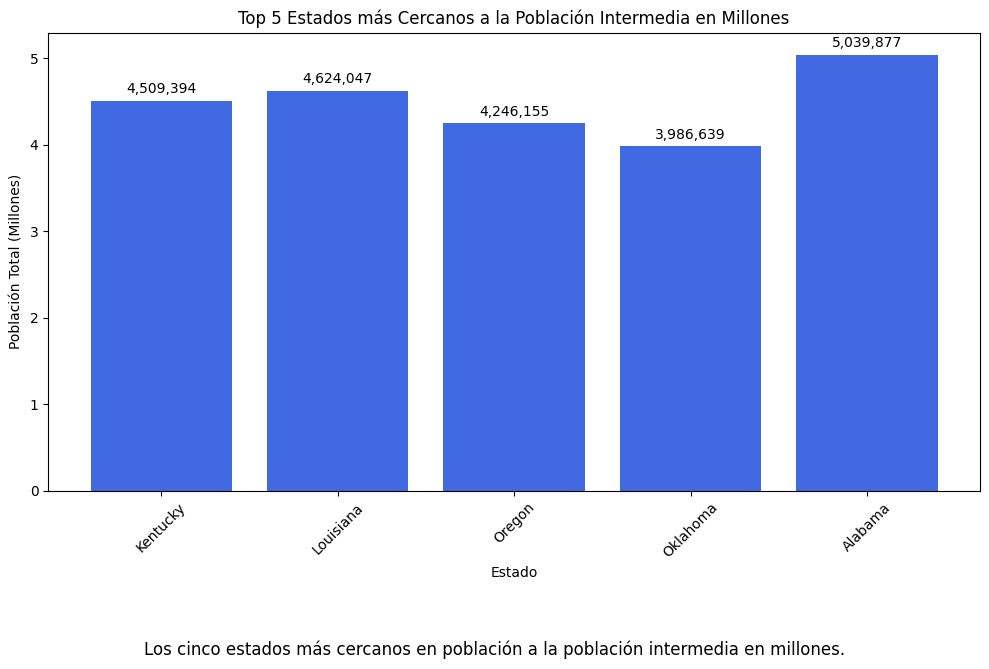

In [66]:


# Definir la población intermedia
poblacion_intermedia = 4509394.0

# Calcular la diferencia entre la población de cada estado y la población intermedia
df_poblacion_final['Diferencia'] = abs(df_poblacion_final['Total population'] - poblacion_intermedia)

# Ordenar el DataFrame por la columna "Diferencia" en orden ascendente y seleccionar los 5 primeros estados
top_5_estados_intermedios = df_poblacion_final.sort_values(by='Diferencia').head(5)

# Crear el gráfico de barras para los estados cercanos a la población intermedia en millones
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_estados_intermedios['Estado'], top_5_estados_intermedios['Total population'] / 1000000.0, color='royalblue')
plt.title('Top 5 Estados más Cercanos a la Población Intermedia en Millones')
plt.xlabel('Estado')
plt.ylabel('Población Total (Millones)')
plt.xticks(rotation=45)

# Agregar el número exacto de habitantes encima de cada barra
for bar, poblacion in zip(bars, top_5_estados_intermedios['Total population']):
    plt.annotate(f'{poblacion:,.0f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3),  # Offset vertical para la etiqueta
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10, color='black')

# Agregar una descripción debajo del gráfico
plt.figtext(0.5, -0.1, 'Los cinco estados más cercanos en población a la población intermedia en millones.', ha='center', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



### DATAFRAME DE LOS ESTADOS CON  POBLACION INTERMEDIA

In [77]:
# Estados que deseas incluir
estados_deseados_intermedia = ['Kentucky', 'Louisiana', 'Oregon', 'Oklahoma', 'Alabama']

# Filtrar el DataFrame para incluir solo los estados deseados
Estados_poblacion_intermedia_df = restaurant_df[restaurant_df['Estado'].isin(estados_deseados_intermedia)]

# Mostrar los resultados
print(Estados_poblacion_intermedia_df)

        Unnamed: 0                                gmap_id   Estado  \
6               12  0x8889221157fb3455:0x5c125c40c3eccc2a  Alabama   
7               14  0x88892bb449d44cb3:0x7beaf0b2e3171a49  Alabama   
7               14  0x88892bb449d44cb3:0x7beaf0b2e3171a49  Alabama   
9               18  0x888cedd24b6af451:0x9958558c300844df  Alabama   
9               18  0x888cedd24b6af451:0x9958558c300844df  Alabama   
...            ...                                    ...      ...   
650591      833659  0x549557a437445bb3:0x72382c7c7f72d995   Oregon   
650591      833659  0x549557a437445bb3:0x72382c7c7f72d995   Oregon   
650591      833659  0x549557a437445bb3:0x72382c7c7f72d995   Oregon   
650591      833659  0x549557a437445bb3:0x72382c7c7f72d995   Oregon   
650591      833659  0x549557a437445bb3:0x72382c7c7f72d995   Oregon   

                        category  avg_rating  \
6               Pizza restaurant         4.1   
7       Chicken wings restaurant         3.2   
7              

In [78]:
Estados_poblacion_intermedia_df

Unnamed: 0                                gmap_id   Estado  \
6               12  0x8889221157fb3455:0x5c125c40c3eccc2a  Alabama   
7               14  0x88892bb449d44cb3:0x7beaf0b2e3171a49  Alabama   
7               14  0x88892bb449d44cb3:0x7beaf0b2e3171a49  Alabama   
9               18  0x888cedd24b6af451:0x9958558c300844df  Alabama   
9               18  0x888cedd24b6af451:0x9958558c300844df  Alabama   
...            ...                                    ...      ...   
650591      833659  0x549557a437445bb3:0x72382c7c7f72d995   Oregon   
650591      833659  0x549557a437445bb3:0x72382c7c7f72d995   Oregon   
650591      833659  0x549557a437445bb3:0x72382c7c7f72d995   Oregon   
650591      833659  0x549557a437445bb3:0x72382c7c7f72d995   Oregon   
650591      833659  0x549557a437445bb3:0x72382c7c7f72d995   Oregon   

                        category  avg_rating  \
6               Pizza restaurant         4.1   
7       Chicken wings restaurant         3.2   
7               Pizza restaurant         3.2   
9        Asian fusion restaurant         4.0   
9             Dessert restaurant         4.0   
...                          ...         ...   
650591      Fast food restaurant         3.0   
650591          Lunch restaurant         3.0   
650591        Mexican restaurant         3.0   
650591           Taco restaurant         3.0   
650591     Vegetarian restaurant         3.0   

                                                   name   latitude   longitude  
6       California Pizza Kitchen at Riverchase Galleria  33.381416  -86.807040  
7                                             Pizza Hut  33.100547  -86.861968  
7                                             Pizza Hut  33.100547  -86.861968  
9                                               Cheetos  32.631013  -85.437473  
9                                               Cheetos  32.631013  -85.437473  
...                                                 ...        ...         ...  
650591                                        Taco Bell  45.048807 -122.975151  
650591                                        Taco Bell  45.048807 -122.975151  
650591                                        Taco Bell  45.048807 -122.975151  
650591                                        Taco Bell  45.048807 -122.975151  
650591                                        Taco Bell  45.048807 -122.975151  

[11060 rows x 8 columns]

In [79]:
# Guardar el DataFrame en un archivo CSV
Estados_poblacion_intermedia_df.to_csv('Estados_poblacion_intermedia_df.csv', index=False)  

# Los 5 Estados de Menor Poblacion de los Estados Unidos

In [72]:
# Encontrar los 5 estados con la población más baja
top_5_estados_menos_poblacion = df_poblacion_final.nsmallest(5, 'Total population')

# Mostrar los resultados
print(top_5_estados_menos_poblacion[['Estado', 'Total population']])



                  Estado  Total population
50               Wyoming            578803
45               Vermont            645570
8   District of Columbia            670050
1                 Alaska            732673
34          North Dakota            774948


In [73]:
top_5_estados_menos_poblacion

Estado  Total population  Diferencia
50               Wyoming            578803   3930591.0
45               Vermont            645570   3863824.0
8   District of Columbia            670050   3839344.0
1                 Alaska            732673   3776721.0
34          North Dakota            774948   3734446.0

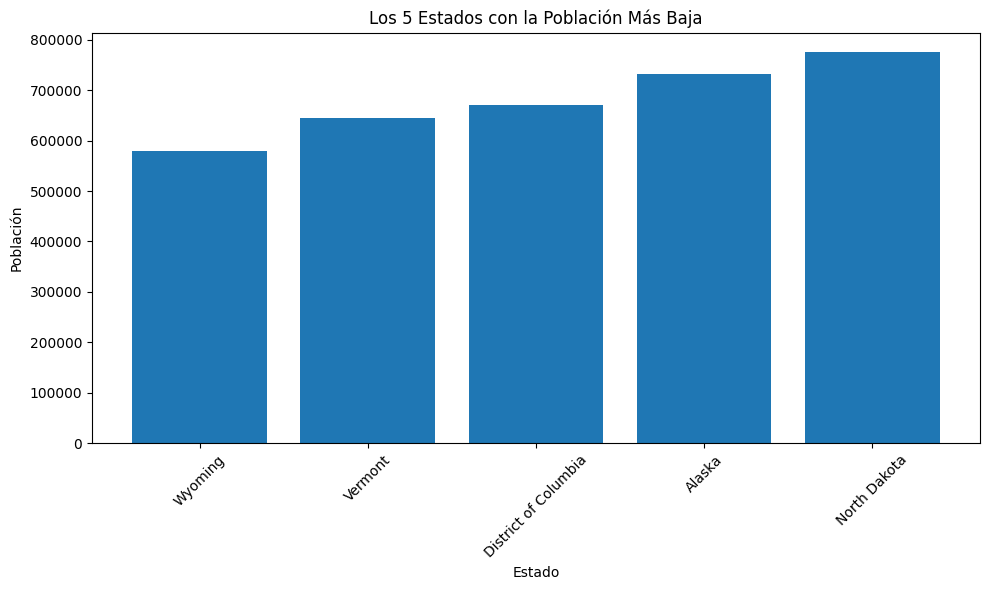

In [80]:


# Encontrar los 5 estados con la población más baja
top_5_estados_menos_poblacion = df_poblacion_final.nsmallest(5, 'Total population')

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))  # Tamaño de la gráfica
plt.bar(top_5_estados_menos_poblacion['Estado'], top_5_estados_menos_poblacion['Total population'])
plt.xlabel('Estado')  # Etiqueta del eje x
plt.ylabel('Población')  # Etiqueta del eje y
plt.title('Los 5 Estados con la Población Más Baja')  # Título de la gráfica
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar la gráfica
plt.tight_layout()
plt.show()


### DATAFRAME DE LOS ESTADOS CON MENOR POBLACION 

In [81]:
# Estados que deseas incluir
estados_deseados_menor = ['Wyoming', 'Vermont', 'District of Columbia', 'Alaska', 'North Dakota']

# Filtrar el DataFrame para incluir solo los estados deseados
top_5_estados_menos_poblacion = restaurant_df[restaurant_df['Estado'].isin(estados_deseados_menor)]

# Mostrar los resultados
print(top_5_estados_menos_poblacion)



        Unnamed: 0                                gmap_id   Estado  \
18345        18757  0x56c895df9164392f:0xd1f10a3c944a7936   Alaska   
18346        18758  0x56c897c50e5008b3:0x1cf3cffd703fcf7c   Alaska   
18358        18770  0x56c8978de7383f61:0xf6378bc1ef92e26c   Alaska   
18366        18778  0x56c897dd0e701991:0xa345baf2459f9bba   Alaska   
18375        18787  0x57abb0cfc31c0d15:0xb167f2687bc999cc   Alaska   
...            ...                                    ...      ...   
807597     1023304  0x4cb521eb6b1a90fb:0xe01ddda161b0fd75  Vermont   
807598     1023305  0x89e0966206f83585:0x8ae04920d9d642fd  Vermont   
807598     1023305  0x89e0966206f83585:0x8ae04920d9d642fd  Vermont   
807598     1023305  0x89e0966206f83585:0x8ae04920d9d642fd  Vermont   
807600     1023307  0x89e05e3516fc7133:0x471cd146ecccefad  Vermont   

                       category  avg_rating                              name  \
18345        Mexican restaurant         3.2                    Picos 'n Salsa 

In [82]:
top_5_estados_menos_poblacion

Unnamed: 0                                gmap_id   Estado  \
18345        18757  0x56c895df9164392f:0xd1f10a3c944a7936   Alaska   
18346        18758  0x56c897c50e5008b3:0x1cf3cffd703fcf7c   Alaska   
18358        18770  0x56c8978de7383f61:0xf6378bc1ef92e26c   Alaska   
18366        18778  0x56c897dd0e701991:0xa345baf2459f9bba   Alaska   
18375        18787  0x57abb0cfc31c0d15:0xb167f2687bc999cc   Alaska   
...            ...                                    ...      ...   
807597     1023304  0x4cb521eb6b1a90fb:0xe01ddda161b0fd75  Vermont   
807598     1023305  0x89e0966206f83585:0x8ae04920d9d642fd  Vermont   
807598     1023305  0x89e0966206f83585:0x8ae04920d9d642fd  Vermont   
807598     1023305  0x89e0966206f83585:0x8ae04920d9d642fd  Vermont   
807600     1023307  0x89e05e3516fc7133:0x471cd146ecccefad  Vermont   

                       category  avg_rating                              name  \
18345        Mexican restaurant         3.2                    Picos 'n Salsa   
18346   East African restaurant         4.7  Safari Restaurant Somali Cuisine   
18358     Vietnamese restaurant         4.6                        Mekong Phở   
18366       American restaurant         3.9                TapRoot in Spenard   
18375      Fast food restaurant         4.5           Dutch Harbor Restaurant   
...                         ...         ...                               ...   
807597     Fast food restaurant         3.7                            Subway   
807598      American restaurant         4.2                          Jensen's   
807598     Breakfast restaurant         4.2                          Jensen's   
807598         Lunch restaurant         4.2                          Jensen's   
807600      American restaurant         4.9                   The Silver Fork   

         latitude   longitude  
18345   61.240632 -149.802957  
18346   61.194694 -149.891705  
18358   61.224429 -149.805876  
18366   61.190217 -149.908233  
18375   53.882991 -166.552444  
...           ...         ...  
807597  43.944279  -72.625045  
807598  42.885953  -73.199308  
807598  42.885953  -73.199308  
807598  42.885953  -73.199308  
807600  43.164017  -73.071841  

[818 rows x 8 columns]

In [83]:
# Guardar el DataFrame en un archivo CSV
top_5_estados_menos_poblacion.to_csv('top_5_estados_menos_poblacion.csv', index=False)  

# ANALISIS POR CONGLOMERADOS DE ESTADOS DE MAYOR POBLACION 

In [84]:

# Calcular la cantidad de veces que aparece cada categoría
category_counts_state = Estados_mayor_poblacion_df['category'].value_counts()

# Encontrar la categoría con la mayor cantidad
most_common_category_state = category_counts_state.idxmax()

# Filtrar el DataFrame original en función de la categoría con la mayor cantidad
most_common_category_state = Estados_mayor_poblacion_df[Estados_mayor_poblacion_df['category'] == most_common_category_state]

# Mostrar el DataFrame resultante
most_common_category_state

Unnamed: 0                                gmap_id      Estado  \
59328        61048  0x80c2d765f8c90a3d:0x16afb75943e7ad50  California   
59452        61296  0x80c331f0c314eff3:0xe697c3eff85c3314  California   
59517        61426  0x80904101ce001281:0x76db23c5d22346ae  California   
59765        61922  0x808f80b286dc6f9b:0xb9c0ee0392825cd4  California   
59877        62146  0x80dbff96b9e714ad:0xc5b6805f367336f9  California   
...            ...                                    ...         ...   
790805     1005650  0x865c5b09e8102fef:0x71308c2bffdbdc1b       Texas   
790816     1005661  0x8640edec14b8122b:0xed0e9a74d79c85a3       Texas   
790859     1005705  0x86fe6d04a7040f37:0x65e8b7ee8d33245c       Texas   
790901     1005748  0x864c288162bdc045:0xdb6ac6c4d76ad3a6       Texas   
790918     1005766  0x8640c1e891f12457:0x5a05bd1c00184ec5       Texas   

                    category  avg_rating  \
59328   Fast food restaurant         3.7   
59452   Fast food restaurant         3.3   
59517   Fast food restaurant         2.4   
59765   Fast food restaurant         3.2   
59877   Fast food restaurant         4.5   
...                      ...         ...   
790805  Fast food restaurant         3.8   
790816  Fast food restaurant         3.3   
790859  Fast food restaurant         4.1   
790901  Fast food restaurant         4.1   
790918  Fast food restaurant         4.6   

                                        name   latitude   longitude  
59328                   Cowboy Burgers & BBQ  34.079995 -117.988951  
59452                             WaBa Grill  34.122791 -117.693457  
59517                             McDonald's  37.785995 -121.218062  
59765                                 Subway  37.808663 -122.268069  
59877                          Baguette Bros  32.826905 -117.155197  
...                                      ...        ...         ...  
790805                           Burger King  29.382207  -98.615674  
790816                                Subway  29.507373  -95.459917  
790859                                Subway  33.548214 -101.849375  
790901                             Buzs Spud  32.937567  -96.924258  
790918  Fadi's Meyerland Mediterranean Grill  29.689632  -95.460273  

[3584 rows x 8 columns]

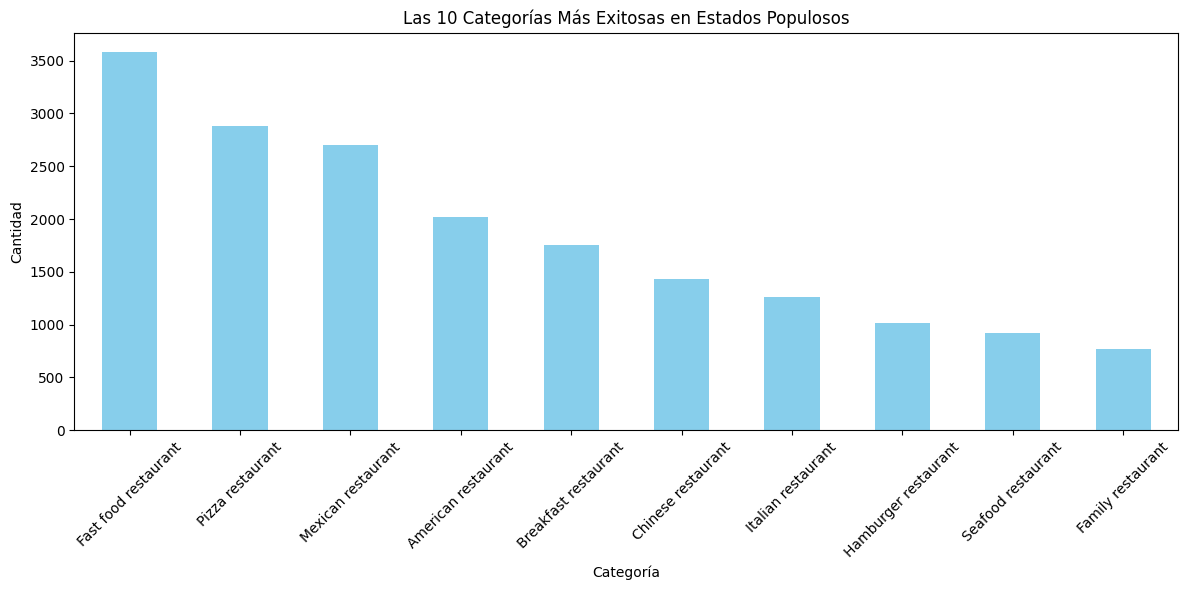

In [86]:

# Calcular las 10 categorías más exitosas
top_10_categorias = Estados_mayor_poblacion_df['category'].value_counts().nlargest(10)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
top_10_categorias.plot(kind='bar', color='skyblue')
plt.xlabel('Categoría')  # Etiqueta del eje x
plt.ylabel('Cantidad')  # Etiqueta del eje y
plt.title('Las 10 Categorías Más Exitosas en Estados Populosos')  # Título de la gráfica
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar la gráfica
plt.tight_layout()
plt.show()



# Franquicias

In [89]:
# Calcular la frecuencia de cada nombre de restaurante
restaurant_name_counts = Estados_mayor_poblacion_df['name'].value_counts()

# Filtrar los nombres que aparecen más de una vez (posibles franquicias)
franquicias = restaurant_name_counts[restaurant_name_counts > 1].index.tolist()

# Mostrar las franquicias
print("Franquicias encontradas:")
for franquicia in franquicias:
    print(franquicia)


Franquicias encontradas:
Subway
Taco Bell
McDonald's
Wawa
Pizza Hut
Little Caesars Pizza
Dunkin'
Chick-fil-A
Domino's Pizza
Popeyes Louisiana Kitchen
Starbucks
Wendy's
Jack in the Box
Burger King
Whataburger
Sonic Drive-In
WaBa Grill
Chipotle Mexican Grill
Papa John's Pizza
Chili's Grill & Bar
Arby's
KFC
Olive Garden Italian Restaurant
IHOP
Papa Murphy's | Take 'N' Bake Pizza
Panda Express
Rita's Italian Ice & Frozen Custard
First Watch
Dunkin
Five Guys
Smoothie King
Denny's
Pizza Hut Express
A&W Restaurant
Golden Corral Buffet & Grill
Del Taco
Dickey's Barbecue Pit
Sbarro
Checkers
Applebee's Grill + Bar
Charleys Cheesesteaks
QuikTrip
Jimmy John's
Baja Fresh Mexican Grill
Long John Silver's
Raising Cane's Chicken Fingers
Wingstop
In-N-Out Burger
Outback Steakhouse
Bonefish Grill
Church's Chicken
Menchie's Frozen Yogurt
Waffle House
Sarku Japan
Cicis
Jersey Mike's Subs
Panera Bread
Round Table Pizza
LongHorn Steakhouse
Moe's Southwest Grill
Clean Juice
Fox's Pizza Den
Nekter Juice Bar
S

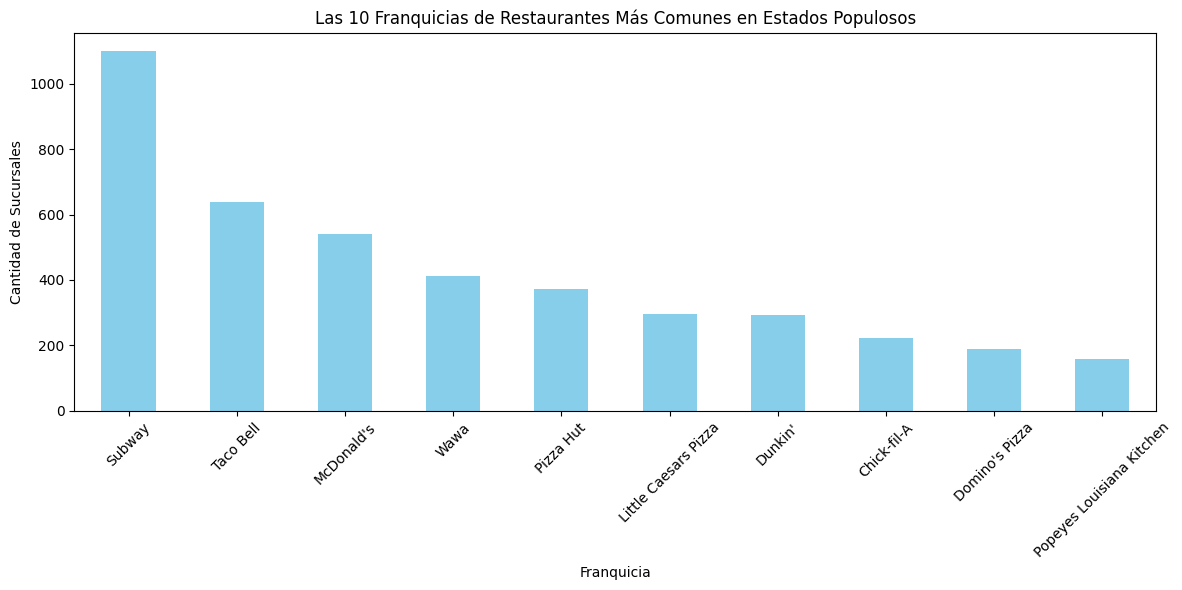

In [91]:


# Calcular la frecuencia de cada nombre de restaurante
restaurant_name_counts = Estados_mayor_poblacion_df['name'].value_counts()

# Filtrar los nombres que aparecen más de una vez (posibles franquicias)
franquicias = restaurant_name_counts[restaurant_name_counts > 1]

# Limitar a las 10 franquicias más comunes
top_10_franquicias = franquicias.head(10)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
top_10_franquicias.plot(kind='bar', color='skyblue')
plt.xlabel('Franquicia')  # Etiqueta del eje x
plt.ylabel('Cantidad de Sucursales')  # Etiqueta del eje y
plt.title('Las 10 Franquicias de Restaurantes Más Comunes en Estados Populosos')  # Título de la gráfica
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar la gráfica
plt.tight_layout()
plt.show()



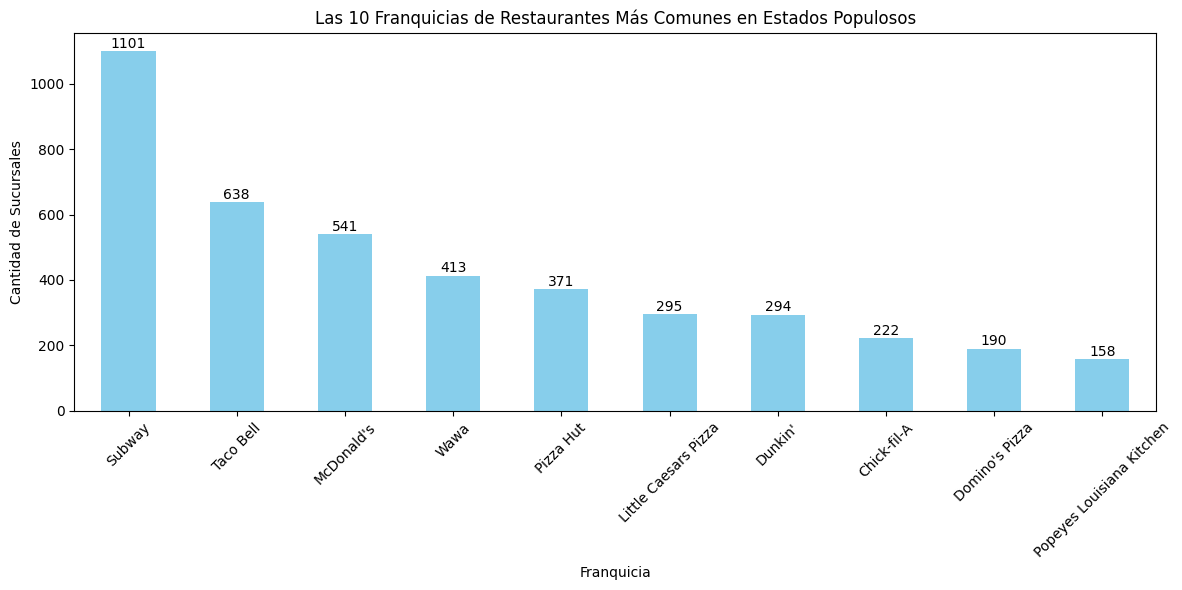

In [92]:


# Calcular la frecuencia de cada nombre de restaurante
restaurant_name_counts = Estados_mayor_poblacion_df['name'].value_counts()

# Filtrar los nombres que aparecen más de una vez (posibles franquicias)
franquicias = restaurant_name_counts[restaurant_name_counts > 1]

# Limitar a las 10 franquicias más comunes
top_10_franquicias = franquicias.head(10)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
top_10_franquicias.plot(kind='bar', color='skyblue')
plt.xlabel('Franquicia')  # Etiqueta del eje x
plt.ylabel('Cantidad de Sucursales')  # Etiqueta del eje y
plt.title('Las 10 Franquicias de Restaurantes Más Comunes en Estados Populosos')  # Título de la gráfica
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Agregar etiquetas con el número exacto de sucursales en las barras
for i, v in enumerate(top_10_franquicias):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [99]:

# Crear un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Ubicación central de EE. UU. y nivel de zoom inicial

# Iterar a través de las 10 franquicias principales
for franquicia in top_10_franquicias.index:
    franquicia_df = Estados_mayor_poblacion_df[Estados_mayor_poblacion_df['name'] == franquicia]

    # Agregar marcadores para cada sucursal de la franquicia
    for index, row in franquicia_df.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            tooltip=row['name'],  # Mostrar el nombre de la franquicia al hacer clic
        ).add_to(mapa)

# Mostrar el mapa interactivo
mapa



# MAPA INTERACTIVO DE SUCURSALES DE SUBWAY

In [100]:


# Crear un mapa centrado en una ubicación inicial
mapa_subway = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Ubicación central de EE. UU. y nivel de zoom inicial

# Filtrar el DataFrame para obtener solo las sucursales de Subway
subway_df = Estados_mayor_poblacion_df[Estados_mayor_poblacion_df['name'] == 'Subway']

# Agregar marcadores para cada sucursal de Subway
for index, row in subway_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        tooltip=row['name'],  # Mostrar el nombre de la sucursal al hacer clic
    ).add_to(mapa_subway)

# Mostrar el mapa interactivo de Subway
mapa_subway


In [106]:

# Filtrar el DataFrame para obtener solo las sucursales de Subway en California
california_df = Estados_mayor_poblacion_df[(Estados_mayor_poblacion_df['Estado'] == 'California') & (Estados_mayor_poblacion_df['name'] == 'Subway')]

# Crear un GeoDataFrame con las coordenadas de latitud y longitud
gdf = gpd.GeoDataFrame(
    california_df, 
    geometry=gpd.points_from_xy(california_df.longitude, california_df.latitude)
)

# Crear un mapa centrado en California
m = folium.Map(location=[36.7783, -119.4179], zoom_start=7)

# Crear un mapa de calor de densidad de puntos
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry ]
HeatMap(heat_data).add_to(m)

# Mostrar el mapa interactivo
m.save('mapa_california.html')  # Guardar el mapa como archivo HTML



In [108]:



# Filtrar el DataFrame para obtener solo las sucursales de Subway en California
california_df = Estados_mayor_poblacion_df[(Estados_mayor_poblacion_df['Estado'] == 'California') & (Estados_mayor_poblacion_df['name'] == 'Subway')]

# Crear un mapa centrado en California
california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Agregar marcadores para cada sucursal en California
for index, row in california_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],  # Puedes personalizar la información que aparece al hacer clic en el marcador
    ).add_to(california_map)

# Mostrar el mapa
california_map.save('mapa_subway_california.html')



# Sucursales de Subway en California


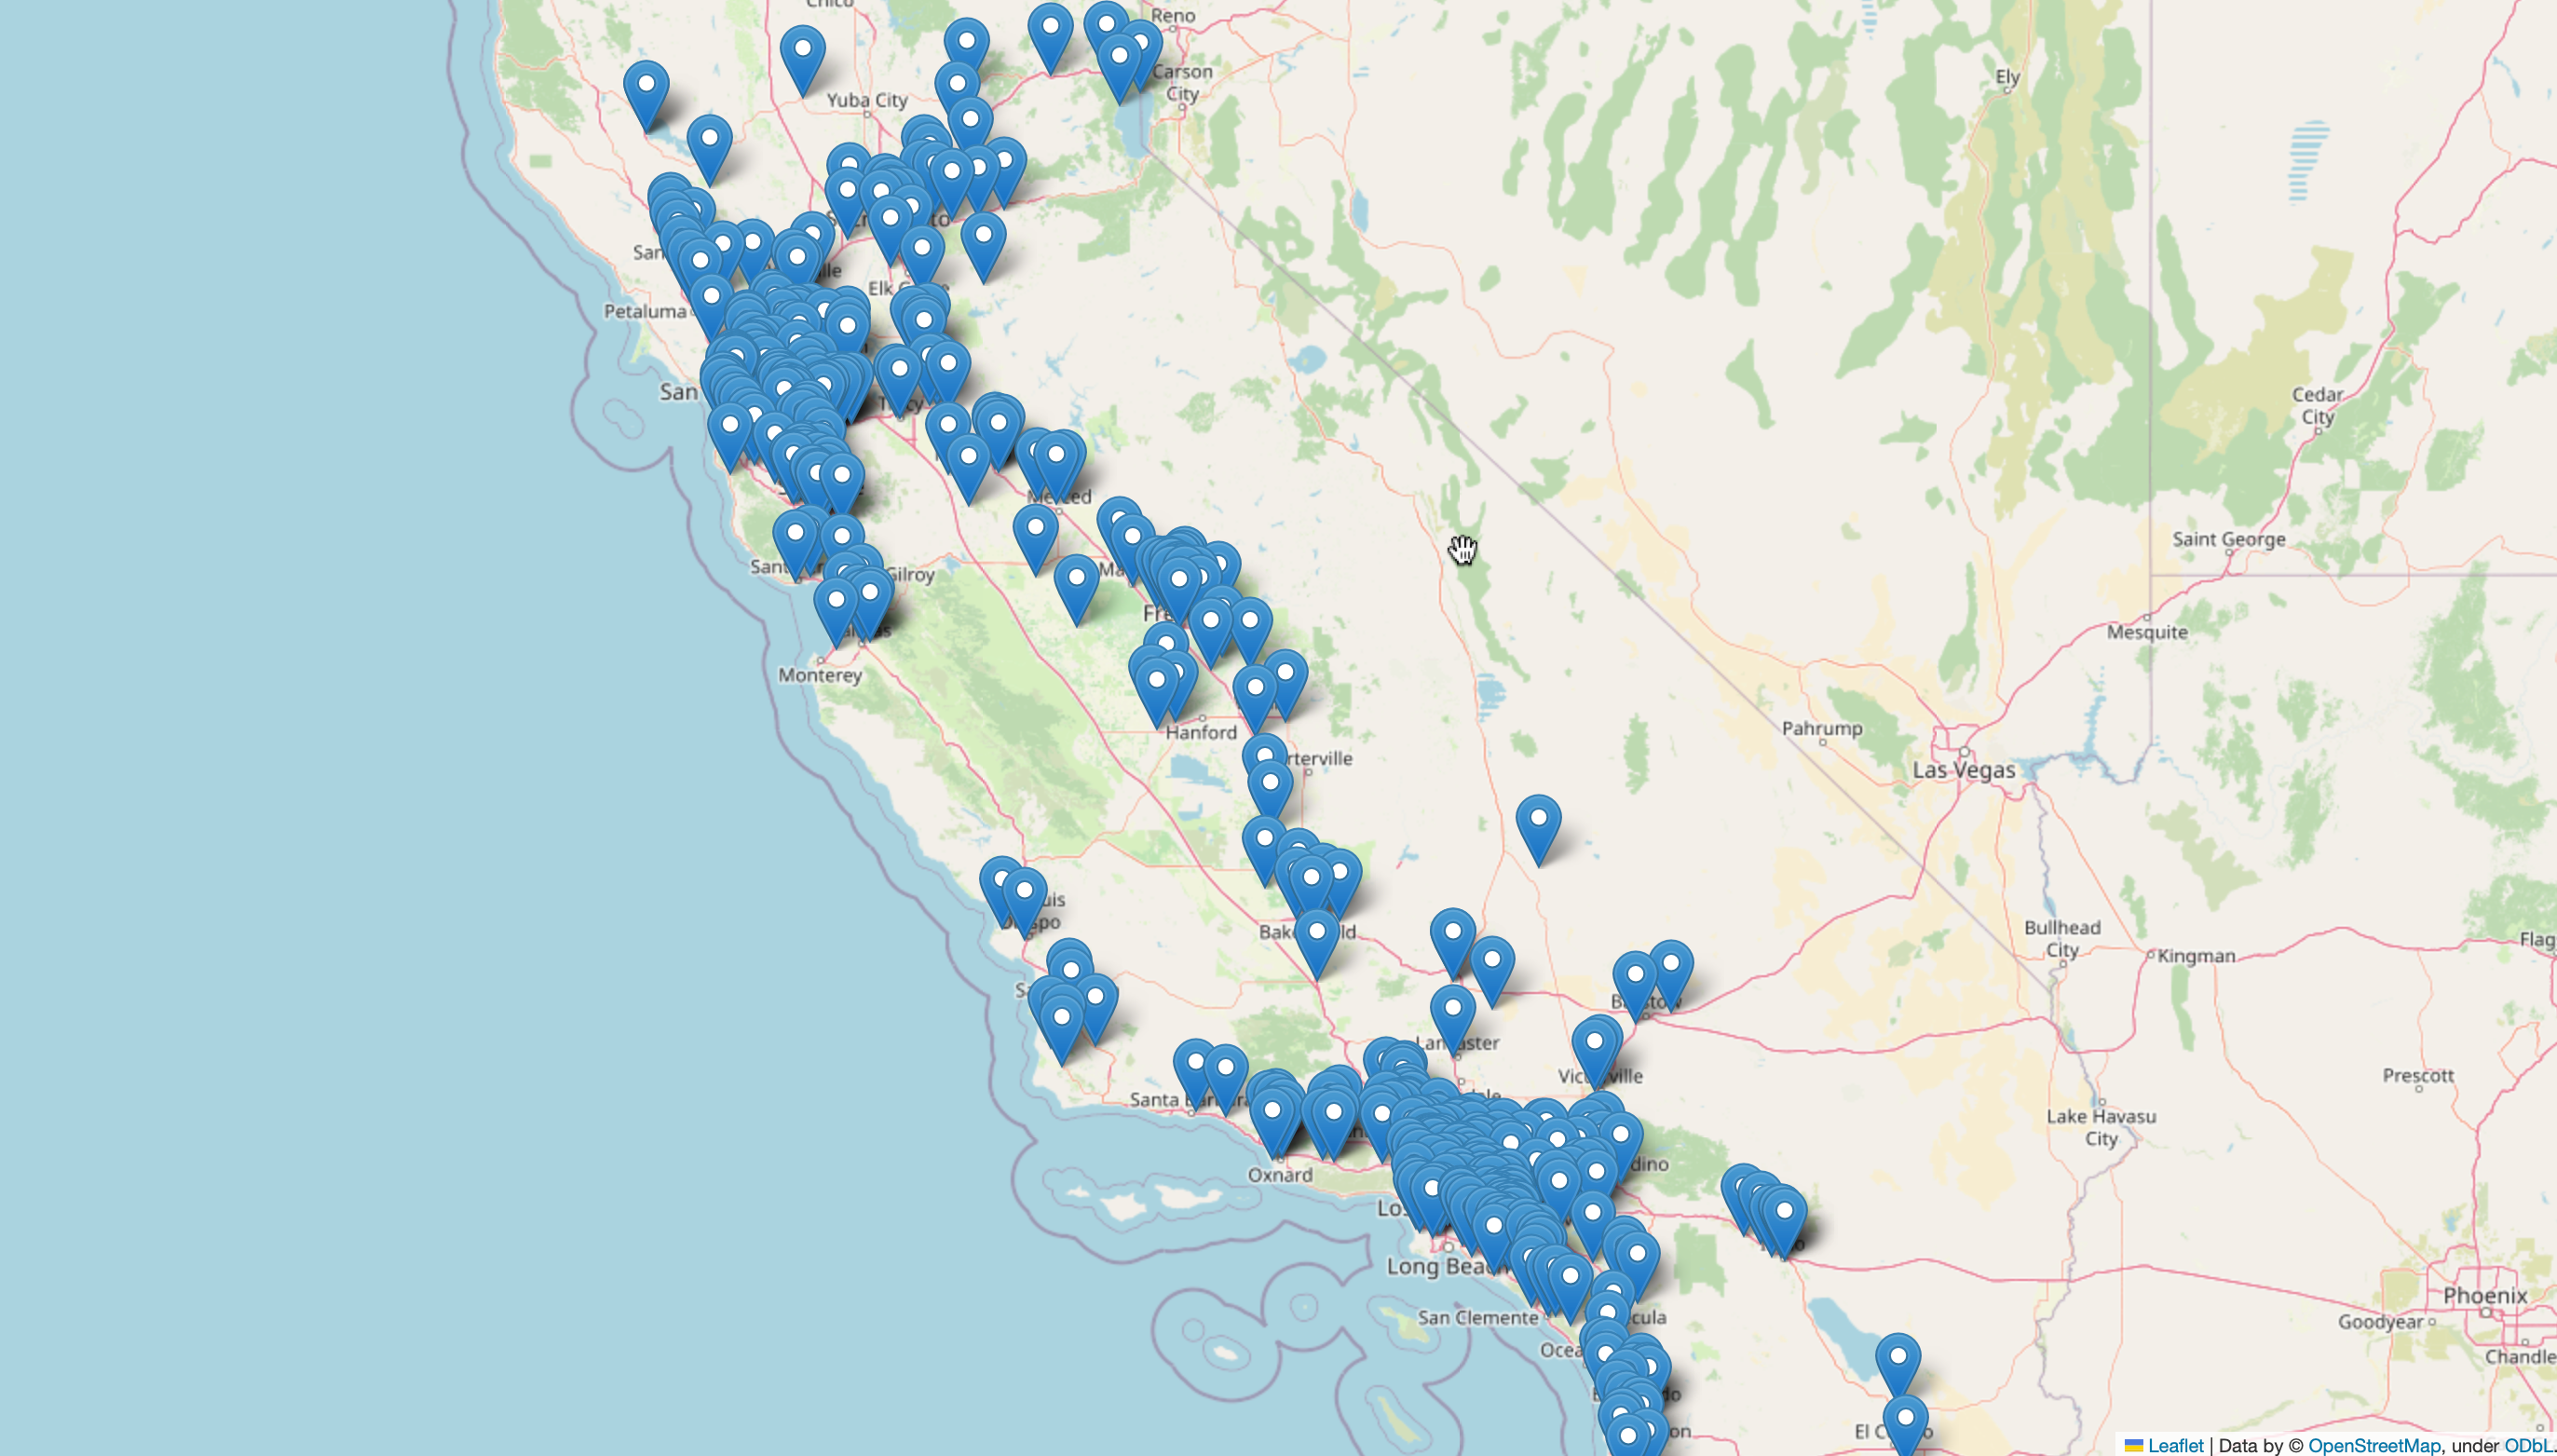

In [123]:
from IPython.display import Image
Image(filename='/Users/benjaminzelaya/Desktop/PGF/PG/PF_DS_REVIEWS_AND_RECOMMENDATIONS/Images/Sucursales Subway California.png')


### Basándonos en la visualización de las ubicaciones de las sucursales de Subway en California a través del mapa interactivo, podemos hacer las siguientes observaciones:

* Distribución Geográfica: Las sucursales de Subway están distribuidas por todo el estado de California. Podemos observar marcadores en diversas áreas, lo que indica que Subway tiene una presencia significativa en todo el estado.

* Ubicaciones Urbanas: La mayoría de las sucursales se encuentran en áreas urbanas o densamente pobladas, como ciudades y suburbios. Esto sugiere que Subway ha establecido su presencia en áreas donde hay una alta concentración de población y actividad comercial.

* Accesibilidad: Las ubicaciones de las sucursales están estratégicamente situadas cerca de carreteras principales y áreas de alto tráfico. Esto facilita el acceso a los clientes y puede aumentar la visibilidad de la marca.

* Distribución Equitativa: Parece que Subway se ha esforzado por distribuir sus sucursales de manera equitativa en todo el estado, lo que podría estar relacionado con su estrategia de llegar a un público amplio y diverso.

* Oportunidades de Expansión: A pesar de la amplia presencia en California, el mapa también revela áreas menos densamente pobladas o lugares con pocos o ningún marcador de Subway. Estas áreas podrían representar oportunidades de expansión para la franquicia, especialmente si existe demanda no satisfecha en esas ubicaciones.

* Competencia: La presencia de otras cadenas de comida rápida y restaurantes cercanos a las sucursales de Subway también puede ser notable en el mapa, lo que indica la competencia en el mercado de comida rápida en California.

## En general, el mapa interactivo de marcadores proporciona una representación visual valiosa de la distribución geográfica de las sucursales de Subway en California. Esta información puede ser utilizada por Subway y los inversores potenciales para tomar decisiones estratégicas sobre la expansión de la franquicia, identificar áreas con potencial de crecimiento y comprender mejor su presencia en el mercado californiano.